In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix


### Problem Statement: Tourism
A reputed tourism company is planning to launch a long term travel package. The Product Manager has access to the existing 
customers’ data and information. He wishes to analyse the trend of existing customers to figure out which customer is going to 
purchase the long term travel package.

In [46]:
df_tourism=pd.read_excel("Tourism.xlsx",sheet_name="Tourism")

In [47]:
plt.savefig("Tourism.png", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [48]:
df_tourism.head()

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Multi,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Multi,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Multi,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Data Report

#### shape of data

In [49]:
print("the number of rows",df_tourism.shape[0],"\nthe number of columns",df_tourism.shape[1])

the number of rows 4888 
the number of columns 20


In [50]:
df_tourism.shape

(4888, 20)

#### checking of data types

In [51]:
df_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [52]:
###  to check whether data type is appropriate for each variable 

#### let's check the descriptive statistics of data

In [53]:
df_tourism.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [54]:
# At least 50% customers are in age of 36(middle age) that is closer to average age of customers also.
# At least 50% customers belong to Tier-1 city. It means 50% customers belongs to metropoletian city.
# At least 75% customers come up with 3 persons to visit the company.
# At least 50% customers perferred to stay in 3 star hotels.
# At least 50% customers are having no passport.It means they are local traveller.
# At least 50% customers are having own car,may be they use their car for travelling.
# At least 50% customers are done total no of trips 3.It means these customers can do travelling most frequently.
# An average montly income of customers are 23619.
# out of 4888 customers on an average total 18% customers are taken long term travel package. 

In [55]:
### For sake of further analysis, we need to convert categorical integer type data into object type.

In [56]:
df_tourism1 = df_tourism.copy()
df_tourism1['ProdTaken'] = df_tourism1['ProdTaken'].apply(lambda x : 'Yes' if x == 1 else 'No')
df_tourism1['CityTier'] = df_tourism1['CityTier'].apply(lambda x : 'Tier-1' if x == 1 else ('Tier-2' if x == 2 else 'Tier-3'))
df_tourism1['Passport'] = df_tourism1['Passport'].apply(lambda x : 'Yes' if x == 1 else 'No')
df_tourism1['OwnCar'] = df_tourism1['OwnCar'].apply(lambda x : 'Yes' if x == 1 else 'No')
df_tourism1['PreferredPropertyStar'].fillna('Unknown',inplace=True)
df_tourism1['PreferredPropertyStar'] = df_tourism1['PreferredPropertyStar'].apply(lambda x : np.nan if x == 'Unknown' else
                                                                                 ('3 Star' if x == 3 else ('4 Star' if x == 4 else '5 Star')))
#df_tourism1['PreferredLoginDevice'].fillna('Unknown',inplace=True)
df_tourism1.head()

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,Yes,41.0,Self Enquiry,Tier-3,6.0,Salaried,Female,3,3.0,Super Deluxe,3 Star,Single,1.0,Yes,2,Yes,0.0,Manager,20993.0
1,200001,No,49.0,Company Invited,Tier-1,14.0,Salaried,Male,3,4.0,Super Deluxe,4 Star,Divorced,2.0,No,3,Yes,2.0,Manager,20130.0
2,200002,Yes,37.0,Self Enquiry,Tier-1,8.0,Free Lancer,Male,3,4.0,Multi,3 Star,Single,7.0,Yes,3,No,0.0,Executive,17090.0
3,200003,No,33.0,Company Invited,Tier-1,9.0,Salaried,Female,2,3.0,Multi,3 Star,Divorced,2.0,Yes,5,Yes,1.0,Executive,17909.0
4,200004,No,NaN,Self Enquiry,Tier-1,8.0,Small Business,Male,2,3.0,Multi,4 Star,Divorced,1.0,No,5,Yes,0.0,Executive,18468.0


In [57]:
### Let's check the info of data

In [58]:
df_tourism1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   object 
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   object 
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   object 
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

#### checking the missing values

In [59]:
miss = df_tourism1.isnull().sum().sort_values(ascending = False)
miss

DurationOfPitch            251
MonthlyIncome              233
Age                        226
NumberOfTrips              140
NumberOfChildrenVisited     66
NumberOfFollowups           45
PreferredPropertyStar       26
PreferredLoginDevice        25
Passport                     0
MaritalStatus                0
ProductPitched               0
Designation                  0
NumberOfPersonVisited        0
Gender                       0
Occupation                   0
PitchSatisfactionScore       0
CityTier                     0
OwnCar                       0
ProdTaken                    0
CustomerID                   0
dtype: int64

In [60]:
#### there are missing values in data.

In [61]:
## age,DurationOfPitch,NumberOfFollowups,Number of trips,NumberofChildrenVisited,MonthlyIncome are
# numerical varible

In [62]:
### PreferredLoginDevice and PreferredPropertyStar are categorical variable.

In [63]:
df_tourism1.isnull().sum().sum()

1012

#### Let's see plot and propensity of missing values

Text(0.5, 1.0, 'count of missingness')

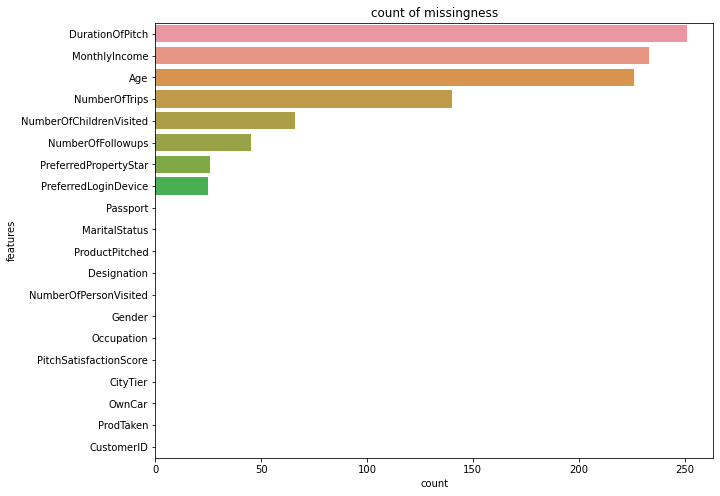

In [64]:
plt.figure(figsize=(10,8))
sns.barplot(y=miss.index,x=miss.values,ci=0)
plt.xlabel("count")
plt.ylabel("features")
plt.title("count of missingness")

In [65]:
miss/len(df_tourism1)

DurationOfPitch            0.051350
MonthlyIncome              0.047668
Age                        0.046236
NumberOfTrips              0.028642
NumberOfChildrenVisited    0.013502
NumberOfFollowups          0.009206
PreferredPropertyStar      0.005319
PreferredLoginDevice       0.005115
Passport                   0.000000
MaritalStatus              0.000000
ProductPitched             0.000000
Designation                0.000000
NumberOfPersonVisited      0.000000
Gender                     0.000000
Occupation                 0.000000
PitchSatisfactionScore     0.000000
CityTier                   0.000000
OwnCar                     0.000000
ProdTaken                  0.000000
CustomerID                 0.000000
dtype: float64

We can see from the above, that the missing values are present in some of the numeric variables, however the extent of missing ness is not very high, it is varying from 0.5% to 5.1%. We can opt for removing these observations, but we will try and impute these missing values to the best extent possible.

#### let's seprate the categorical and numerical variable

In [66]:
categorical = list(df_tourism1.dtypes[df_tourism1.dtypes == 'object'].index)
numerical = list(df_tourism1.dtypes[df_tourism1.dtypes != 'object'].index)

#### Let's treat the missing  value

In [67]:
df_tourism2_num = df_tourism1[numerical]
df_tourism2_num

,CustomerID,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,MonthlyIncome
0,200000,41.0,6.0,3,3.0,1.0,2,0.0,20993.0
1,200001,49.0,14.0,3,4.0,2.0,3,2.0,20130.0
2,200002,37.0,8.0,3,4.0,7.0,3,0.0,17090.0
3,200003,33.0,9.0,2,3.0,2.0,5,1.0,17909.0
4,200004,NaN,8.0,2,3.0,1.0,5,0.0,18468.0
...,...,...,...,...,...,...,...,...,...
4883,204883,49.0,9.0,3,5.0,2.0,1,1.0,26576.0
4884,204884,28.0,31.0,4,5.0,3.0,3,2.0,21212.0
4885,204885,52.0,17.0,4,4.0,7.0,1,3.0,31820.0
4886,204886,19.0,16.0,3,4.0,3.0,5,2.0,20289.0


#### treating the missing values

In [68]:
df_tourism2_num["Age"]=df_tourism2_num["Age"].fillna(df_tourism2_num["Age"].median())
df_tourism2_num["DurationOfPitch"]=df_tourism2_num["DurationOfPitch"].fillna(df_tourism2_num["DurationOfPitch"].median())
df_tourism2_num["NumberOfFollowups"]=df_tourism2_num["NumberOfFollowups"].fillna(df_tourism2_num["NumberOfFollowups"].median())
df_tourism2_num["NumberOfTrips"]=df_tourism2_num["NumberOfTrips"].fillna(df_tourism2_num["NumberOfTrips"].median())
df_tourism2_num["NumberOfChildrenVisited"]=df_tourism2_num["NumberOfChildrenVisited"].fillna(df_tourism2_num["NumberOfChildrenVisited"].median())
df_tourism2_num["MonthlyIncome"]=df_tourism2_num["MonthlyIncome"].fillna(df_tourism2_num["MonthlyIncome"].median())

In [69]:
df_tourism2_num.isnull().sum()

CustomerID                 0
Age                        0
DurationOfPitch            0
NumberOfPersonVisited      0
NumberOfFollowups          0
NumberOfTrips              0
PitchSatisfactionScore     0
NumberOfChildrenVisited    0
MonthlyIncome              0
dtype: int64

In [70]:
### for categorical variable

In [71]:
df_tourism2_cat = df_tourism1[categorical]
df_tourism2_cat.head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation
0,Yes,Self Enquiry,Tier-3,Salaried,Female,Super Deluxe,3 Star,Single,Yes,Yes,Manager
1,No,Company Invited,Tier-1,Salaried,Male,Super Deluxe,4 Star,Divorced,No,Yes,Manager
2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive
3,No,Company Invited,Tier-1,Salaried,Female,Multi,3 Star,Divorced,Yes,Yes,Executive
4,No,Self Enquiry,Tier-1,Small Business,Male,Multi,4 Star,Divorced,No,Yes,Executive


In [72]:
df_tourism2_cat.isnull().sum()

ProdTaken                 0
PreferredLoginDevice     25
CityTier                  0
Occupation                0
Gender                    0
ProductPitched            0
PreferredPropertyStar    26
MaritalStatus             0
Passport                  0
OwnCar                    0
Designation               0
dtype: int64

In [73]:
df_mode=df_tourism2_cat["PreferredLoginDevice"].mode()[0]
df_mode

'Self Enquiry'

In [74]:
df_mode1=df_tourism2_cat["PreferredPropertyStar"].mode()[0]
df_mode1

'3 Star'

In [75]:
df_tourism2_cat["PreferredLoginDevice"]=df_tourism2_cat["PreferredLoginDevice"].replace(np.nan,df_mode)
df_tourism2_cat["PreferredPropertyStar"]=df_tourism2_cat["PreferredPropertyStar"].replace(np.nan,df_mode1)

In [76]:
df_tourism2_cat.isnull().sum()

ProdTaken                0
PreferredLoginDevice     0
CityTier                 0
Occupation               0
Gender                   0
ProductPitched           0
PreferredPropertyStar    0
MaritalStatus            0
Passport                 0
OwnCar                   0
Designation              0
dtype: int64

In [77]:
### Let's concate numerical and categorical column

In [78]:
df_tourism2 = pd.concat([df_tourism2_cat,df_tourism2_num],axis=1)
df_tourism2.head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,CustomerID,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,MonthlyIncome
0,Yes,Self Enquiry,Tier-3,Salaried,Female,Super Deluxe,3 Star,Single,Yes,Yes,Manager,200000,41.0,6.0,3,3.0,1.0,2,0.0,20993.0
1,No,Company Invited,Tier-1,Salaried,Male,Super Deluxe,4 Star,Divorced,No,Yes,Manager,200001,49.0,14.0,3,4.0,2.0,3,2.0,20130.0
2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,200002,37.0,8.0,3,4.0,7.0,3,0.0,17090.0
3,No,Company Invited,Tier-1,Salaried,Female,Multi,3 Star,Divorced,Yes,Yes,Executive,200003,33.0,9.0,2,3.0,2.0,5,1.0,17909.0
4,No,Self Enquiry,Tier-1,Small Business,Male,Multi,4 Star,Divorced,No,Yes,Executive,200004,36.0,8.0,2,3.0,1.0,5,0.0,18468.0


#### checking for duplicates

In [79]:
dupes=df_tourism2.duplicated()
print("total no of duplicates rows %d"%sum(dupes))

total no of duplicates rows 0


#### checking of unique values in cateogariacal variable

In [80]:
for i in categorical:
    print(i)
    print(df_tourism2[i].value_counts())
    print()

ProdTaken
No     3968
Yes     920
Name: ProdTaken, dtype: int64

PreferredLoginDevice
Self Enquiry       3469
Company Invited    1419
Name: PreferredLoginDevice, dtype: int64

CityTier
Tier-1    3190
Tier-3    1500
Tier-2     198
Name: CityTier, dtype: int64

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Gender
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

ProductPitched
Multi           1842
Super Deluxe    1732
Standard         742
Deluxe           342
King             230
Name: ProductPitched, dtype: int64

PreferredPropertyStar
3 Star    3019
5 Star     956
4 Star     913
Name: PreferredPropertyStar, dtype: int64

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Passport
No     3466
Yes    1422
Name: Passport, dtype: int64

OwnCar
Yes    3032
No     1856
Name: OwnCar, dtype: int64

Designation
E

#### let's check the propensity in traget variable

In [81]:
df_tourism2["ProdTaken"].value_counts(normalize=True)

No     0.811784
Yes    0.188216
Name: ProdTaken, dtype: float64

In [82]:
### Only 18% of customer is going to opt long term tourism package. imbalaNCE data.

In [83]:
df_tourism2['NumberOfTrips'].unique()

array([ 1.,  2.,  7.,  5.,  6.,  3.,  4., 19., 21.,  8., 20., 22.])

### Univariate Analysis 

In [84]:
## drop unwanted column

In [85]:
df_tourism2=df_tourism2.drop(["CustomerID"],axis=1)
df_tourism2['Gender'] = df_tourism2['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)
df_tourism2['NumberOfPersonVisited'] = np.round(df_tourism2['NumberOfPersonVisited'],0)
df_tourism2['NumberOfFollowups'] = np.round(df_tourism2['NumberOfFollowups'],0)
df_tourism2['NumberOfTrips'] = np.round(df_tourism2['NumberOfTrips'],0)
df_tourism2['NumberOfChildrenVisited'] = np.round(df_tourism2['NumberOfChildrenVisited'],0)
df_tourism2.head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,MonthlyIncome
0,Yes,Self Enquiry,Tier-3,Salaried,Female,Super Deluxe,3 Star,Single,Yes,Yes,Manager,41.0,6.0,3,3.0,1.0,2,0.0,20993.0
1,No,Company Invited,Tier-1,Salaried,Male,Super Deluxe,4 Star,Divorced,No,Yes,Manager,49.0,14.0,3,4.0,2.0,3,2.0,20130.0
2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,37.0,8.0,3,4.0,7.0,3,0.0,17090.0
3,No,Company Invited,Tier-1,Salaried,Female,Multi,3 Star,Divorced,Yes,Yes,Executive,33.0,9.0,2,3.0,2.0,5,1.0,17909.0
4,No,Self Enquiry,Tier-1,Small Business,Male,Multi,4 Star,Divorced,No,Yes,Executive,36.0,8.0,2,3.0,1.0,5,0.0,18468.0


In [86]:
df_tourism2_cat.columns

Index(['ProdTaken', 'PreferredLoginDevice', 'CityTier', 'Occupation', 'Gender',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport',
       'OwnCar', 'Designation'],
      dtype='object')

In [87]:
df_tourism2_num.columns

Index(['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'NumberOfTrips', 'PitchSatisfactionScore',
       'NumberOfChildrenVisited', 'MonthlyIncome'],
      dtype='object')

#### Univariate Analysis for Numerical variables

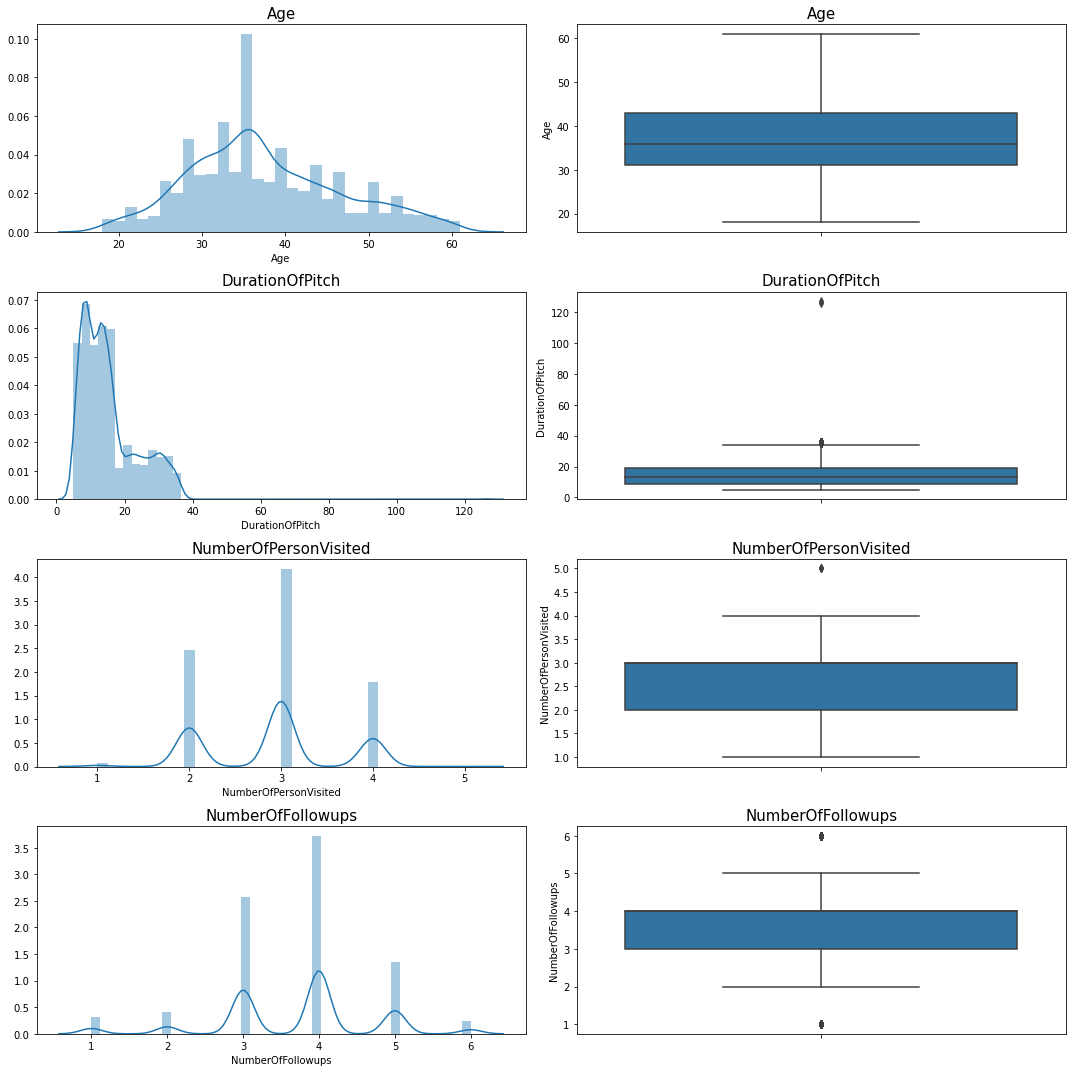

In [88]:
## Univariate except class column

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)
a = sns.distplot(df_tourism2['Age'] , ax=axes[0][0])
a.set_title("Age",fontsize=15)
a = sns.boxplot(df_tourism2['Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age",fontsize=15)


a = sns.distplot(df_tourism2["DurationOfPitch"] , ax=axes[1][0])
a.set_title("DurationOfPitch",fontsize=15)
a = sns.boxplot(df_tourism2['DurationOfPitch'] , orient = "v" , ax=axes[1][1])
a.set_title("DurationOfPitch",fontsize=15)


a = sns.distplot(df_tourism2['NumberOfPersonVisited'] , ax=axes[2][0])
a.set_title("NumberOfPersonVisited",fontsize=15)
a = sns.boxplot(df_tourism2['NumberOfPersonVisited'] , orient = "v" , ax=axes[2][1])
a.set_title("NumberOfPersonVisited",fontsize=15)

a = sns.distplot(df_tourism2['NumberOfFollowups'] , ax=axes[3][0])
a.set_title("NumberOfFollowups",fontsize=15)
a = sns.boxplot(df_tourism2['NumberOfFollowups'] , orient = "v" , ax=axes[3][1])
a.set_title("NumberOfFollowups",fontsize=15)

plt.tight_layout()
plt.show()

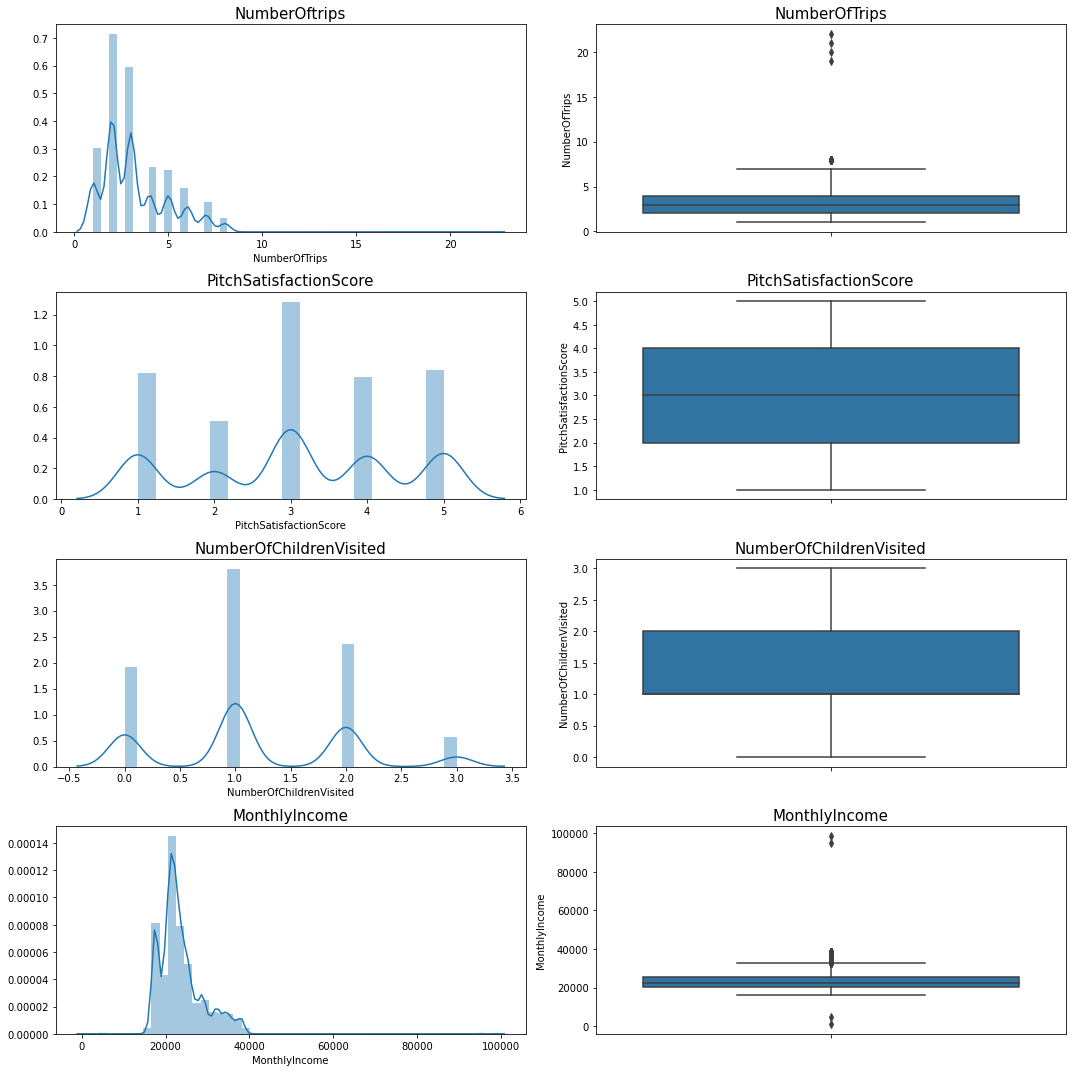

In [89]:


fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)

a = sns.distplot(df_tourism2['NumberOfTrips'] , ax=axes[0][0])
a.set_title("NumberOftrips",fontsize=15)
a = sns.boxplot(df_tourism2['NumberOfTrips'] , orient = "v" , ax=axes[0][1])
a.set_title("NumberOfTrips",fontsize=15)

a = sns.distplot(df_tourism2["PitchSatisfactionScore"] , ax=axes[1][0])
a.set_title("PitchSatisfactionScore",fontsize=15)
a = sns.boxplot(df_tourism2['PitchSatisfactionScore'] , orient = "v" , ax=axes[1][1])
a.set_title("PitchSatisfactionScore",fontsize=15)


a = sns.distplot(df_tourism2['NumberOfChildrenVisited'] , ax=axes[2][0])
a.set_title("NumberOfChildrenVisited",fontsize=15)
a = sns.boxplot(df_tourism2['NumberOfChildrenVisited'] , orient = "v" , ax=axes[2][1])
a.set_title("NumberOfChildrenVisited",fontsize=15)

a = sns.distplot(df_tourism2["MonthlyIncome"] , ax=axes[3][0])
a.set_title("MonthlyIncome",fontsize=15)
a = sns.boxplot(df_tourism2['MonthlyIncome'] , orient = "v" , ax=axes[3][1])
a.set_title("MonthlyIncome",fontsize=15)

plt.tight_layout()
plt.show()

We can see from the above distribution plots, that most of the numerical values have very few unique values, hence we can see 
multiple peaks forming in the distribution plots. Since this is a Classification Problem We can choose to leave such variables
the way they are. To remove such multimodal distribution what we can do is create buckets, commonly called as Binning.

#### Feature Engineering

1.variable transformation: binnig

2.variable creation: one hot encoding and  categarical().code

In [90]:
df_tourism3 = df_tourism2.copy()
df_tourism3['DurationOfPitch'].describe()


count    4888.000000
mean       15.362930
std         8.316166
min         5.000000
25%         9.000000
50%        13.000000
75%        19.000000
max       127.000000
Name: DurationOfPitch, dtype: float64

In [91]:
## let's create new variable

In [92]:
## Binning using quartile:Duration Of pit
df_tourism3['DurationOfPitch_bins'] = pd.qcut(df_tourism3['DurationOfPitch'],q=4,labels=['Really Low','Low','Medium','High'])
df_tourism3['DurationOfPitch_bins'] = df_tourism3['DurationOfPitch_bins'].astype('object')
df_tourism3['DurationOfPitch_bins'].value_counts()

Really Low    1471
High          1199
Low           1118
Medium        1100
Name: DurationOfPitch_bins, dtype: int64

The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that qcut tries to 
divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution 
of the data, not the actual numeric edges of the bins.

In [93]:
# Binning using lambda function - Number of persons Visited
df_tourism3['NumberOfPersonVisited_bins'] = df_tourism3['NumberOfPersonVisited'].apply(lambda x : 
                                                                                       'One or Two' if x<3 else 'Three and above')
df_tourism3['NumberOfPersonVisited_bins'].value_counts()

Three and above    3431
One or Two         1457
Name: NumberOfPersonVisited_bins, dtype: int64

In [94]:
df_tourism3['NumberOfFollowups_bins'] = pd.qcut(df_tourism3['NumberOfFollowups'],q=4,labels = ['Low','Medium','High'],duplicates='drop')
df_tourism3['NumberOfFollowups_bins'] = df_tourism3['NumberOfFollowups_bins'].astype('object')
df_tourism3['NumberOfFollowups_bins'].value_counts()

Medium    2113
Low       1871
High       904
Name: NumberOfFollowups_bins, dtype: int64

In [95]:
df_tourism3['NumberOfTrips_bins'] = pd.qcut(df_tourism3['NumberOfTrips'],q=4,labels = ['Low','Medium','High','Very High'])
df_tourism3['NumberOfTrips_bins'] = df_tourism3['NumberOfTrips_bins'].astype('object')
df_tourism3['NumberOfTrips_bins'].value_counts()

Low          2084
Medium       1219
Very High    1107
High          478
Name: NumberOfTrips_bins, dtype: int64

In [96]:
df_tourism3['PitchSatisfactionScore_bins'] = df_tourism3['PitchSatisfactionScore'].map({1 : 'Bad',2: 'OK',3: 'Good',4: 'Very Good',5: 'Excellent'})
df_tourism3['PitchSatisfactionScore_bins'].value_counts()

Good         1478
Excellent     970
Bad           942
Very Good     912
OK            586
Name: PitchSatisfactionScore_bins, dtype: int64

In [97]:
df_tourism3['NumberOfChildrenVisited_bins'] = df_tourism3['NumberOfChildrenVisited'].apply(lambda x: 'One' if x<2 else '2 or more')
df_tourism3['NumberOfChildrenVisited_bins'].value_counts()

One          3228
2 or more    1660
Name: NumberOfChildrenVisited_bins, dtype: int64

In [98]:
df_tourism3.drop(['DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups','NumberOfTrips','PitchSatisfactionScore',
                  'NumberOfChildrenVisited'],axis=1,inplace=True)

In [99]:
df_tourism3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ProdTaken                     4888 non-null   object 
 1   PreferredLoginDevice          4888 non-null   object 
 2   CityTier                      4888 non-null   object 
 3   Occupation                    4888 non-null   object 
 4   Gender                        4888 non-null   object 
 5   ProductPitched                4888 non-null   object 
 6   PreferredPropertyStar         4888 non-null   object 
 7   MaritalStatus                 4888 non-null   object 
 8   Passport                      4888 non-null   object 
 9   OwnCar                        4888 non-null   object 
 10  Designation                   4888 non-null   object 
 11  Age                           4888 non-null   float64
 12  MonthlyIncome                 4888 non-null   float64
 13  Dur

In [100]:
### only age and monthly income are numeric variable.

In [101]:
numerical2 = list(df_tourism3.dtypes[df_tourism3.dtypes != 'object'].index)
categorical2 = list(df_tourism3.dtypes[df_tourism3.dtypes == 'object'].index)

In [102]:
## let's do univariate analysis for numerica2

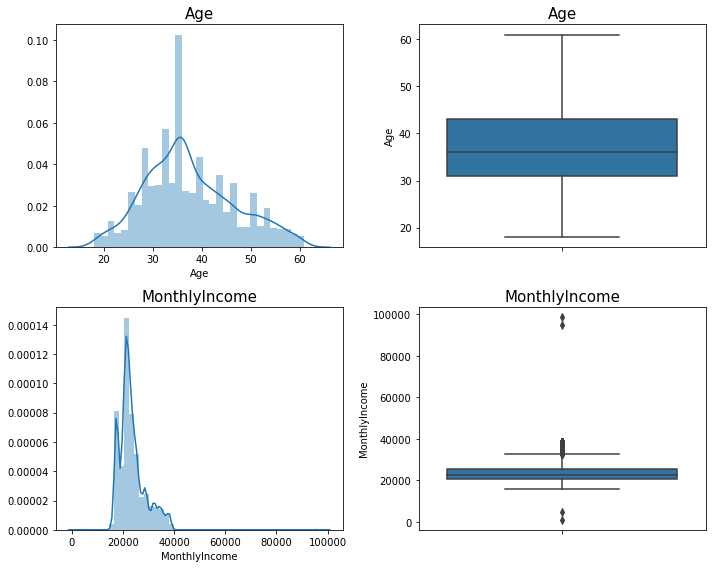

In [103]:
## Univariate except class column

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10, 8)
a = sns.distplot(df_tourism3['Age'] , ax=axes[0][0])
a.set_title("Age",fontsize=15)
a = sns.boxplot(df_tourism3['Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age",fontsize=15)


a = sns.distplot(df_tourism3["MonthlyIncome"] , ax=axes[1][0])
a.set_title("MonthlyIncome",fontsize=15)
a = sns.boxplot(df_tourism3['MonthlyIncome'] , orient = "v" , ax=axes[1][1])
a.set_title("MonthlyIncome",fontsize=15)

plt.tight_layout()
plt.show()

#### UnivariateAnalysis for Categorical variable and binned variables

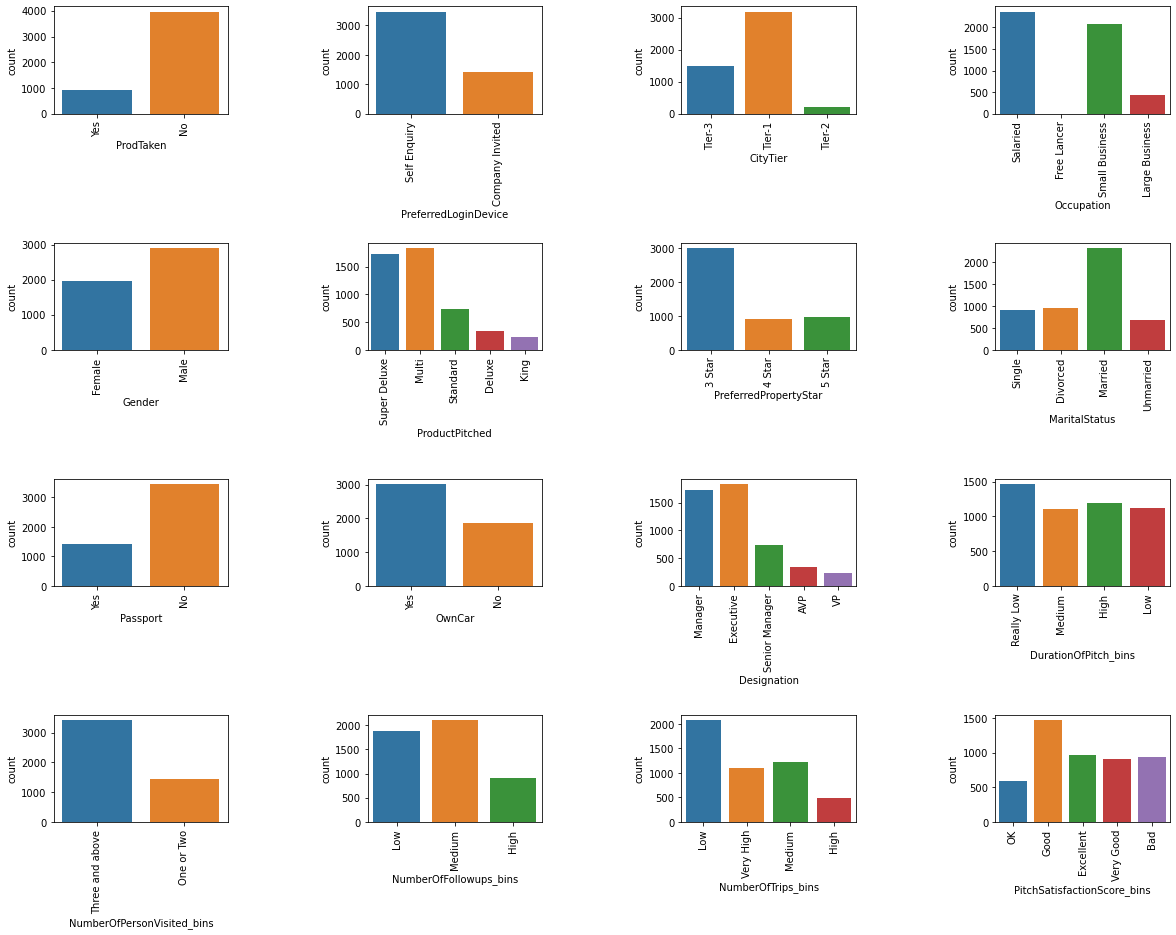

In [104]:
fig,axes = plt.subplots(4,4,figsize=(20,15))
plt.subplots_adjust(wspace=0.8,hspace=1.2)
for i,ax in zip(categorical2,axes.flatten()):
    sns.countplot(df_tourism3[i],ax=ax)
    ax.set_xticklabels(list(df_tourism3[i].unique()),rotation=90)

#### univariate analysis for all categorical variable (df_tourism2)

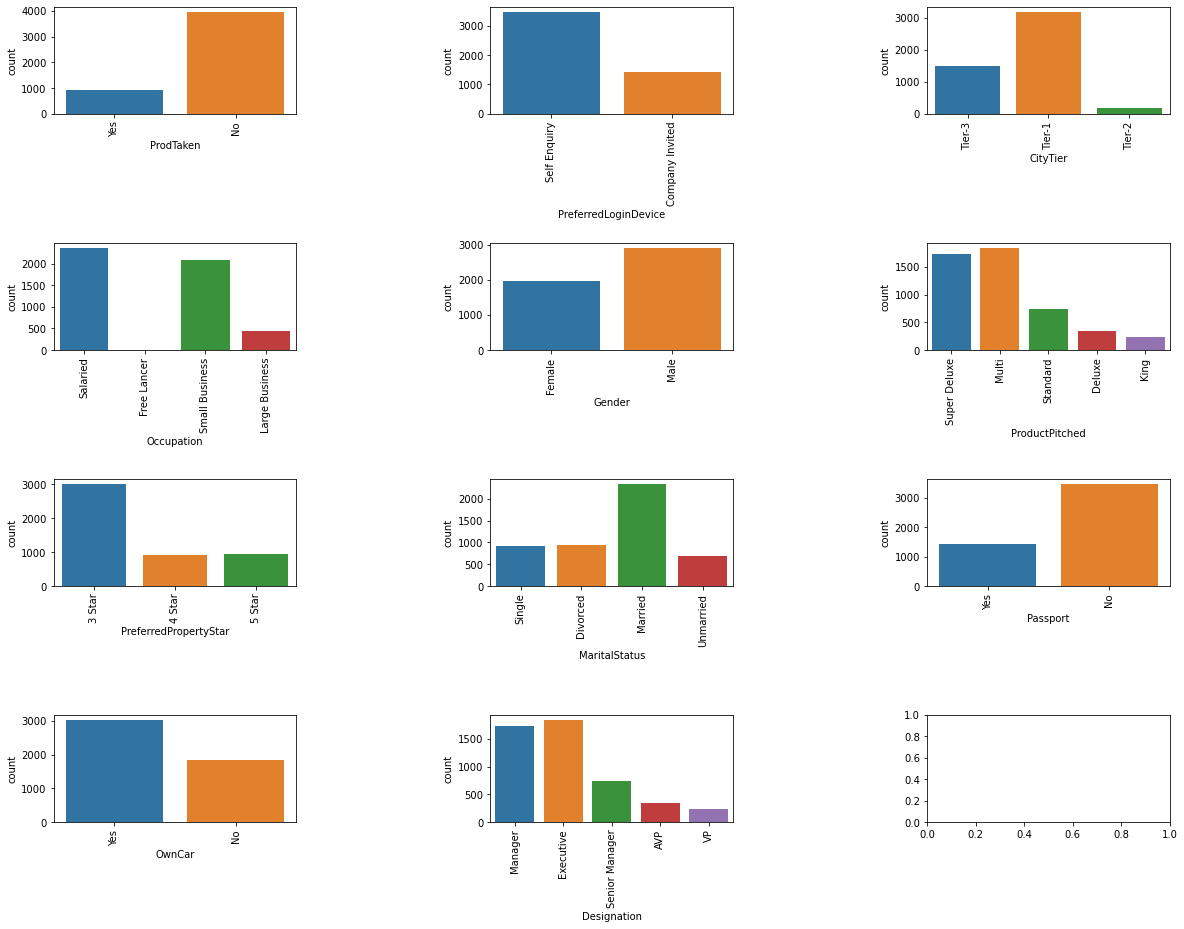

In [105]:
fig,axes = plt.subplots(4,3,figsize=(20,15))
plt.subplots_adjust(wspace=0.8,hspace=1.2)
ax.set_title("    Univariate anlalysis of all categorical variables    ")
for i,ax in zip(categorical,axes.flatten()):
    sns.countplot(df_tourism2[i],ax=ax)
    ax.set_xticklabels(list(df_tourism2[i].unique()),rotation=90)
       

Text(0.5, 1.0, 'count plot of Designation')

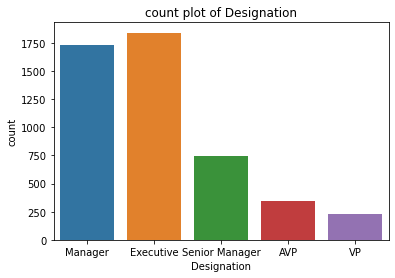

In [106]:
sns.countplot(df_tourism2["Designation"])
plt.title("count plot of Designation")

In [107]:
# Looking at the proportions
for i in categorical2:
    print('Proportion of Customers as per {}'.format(i))
    print()
    print(df_tourism3[i].value_counts(normalize=True))
    print()

Proportion of Customers as per ProdTaken

No     0.811784
Yes    0.188216
Name: ProdTaken, dtype: float64

Proportion of Customers as per PreferredLoginDevice

Self Enquiry       0.709697
Company Invited    0.290303
Name: PreferredLoginDevice, dtype: float64

Proportion of Customers as per CityTier

Tier-1    0.652619
Tier-3    0.306874
Tier-2    0.040507
Name: CityTier, dtype: float64

Proportion of Customers as per Occupation

Salaried          0.484452
Small Business    0.426350
Large Business    0.088789
Free Lancer       0.000409
Name: Occupation, dtype: float64

Proportion of Customers as per Gender

Male      0.596563
Female    0.403437
Name: Gender, dtype: float64

Proportion of Customers as per ProductPitched

Multi           0.376841
Super Deluxe    0.354337
Standard        0.151800
Deluxe          0.069967
King            0.047054
Name: ProductPitched, dtype: float64

Proportion of Customers as per PreferredPropertyStar

3 Star    0.617635
5 Star    0.195581
4 Star    0.1867

### Bi-VariateAnalysis and multivariate Analysis

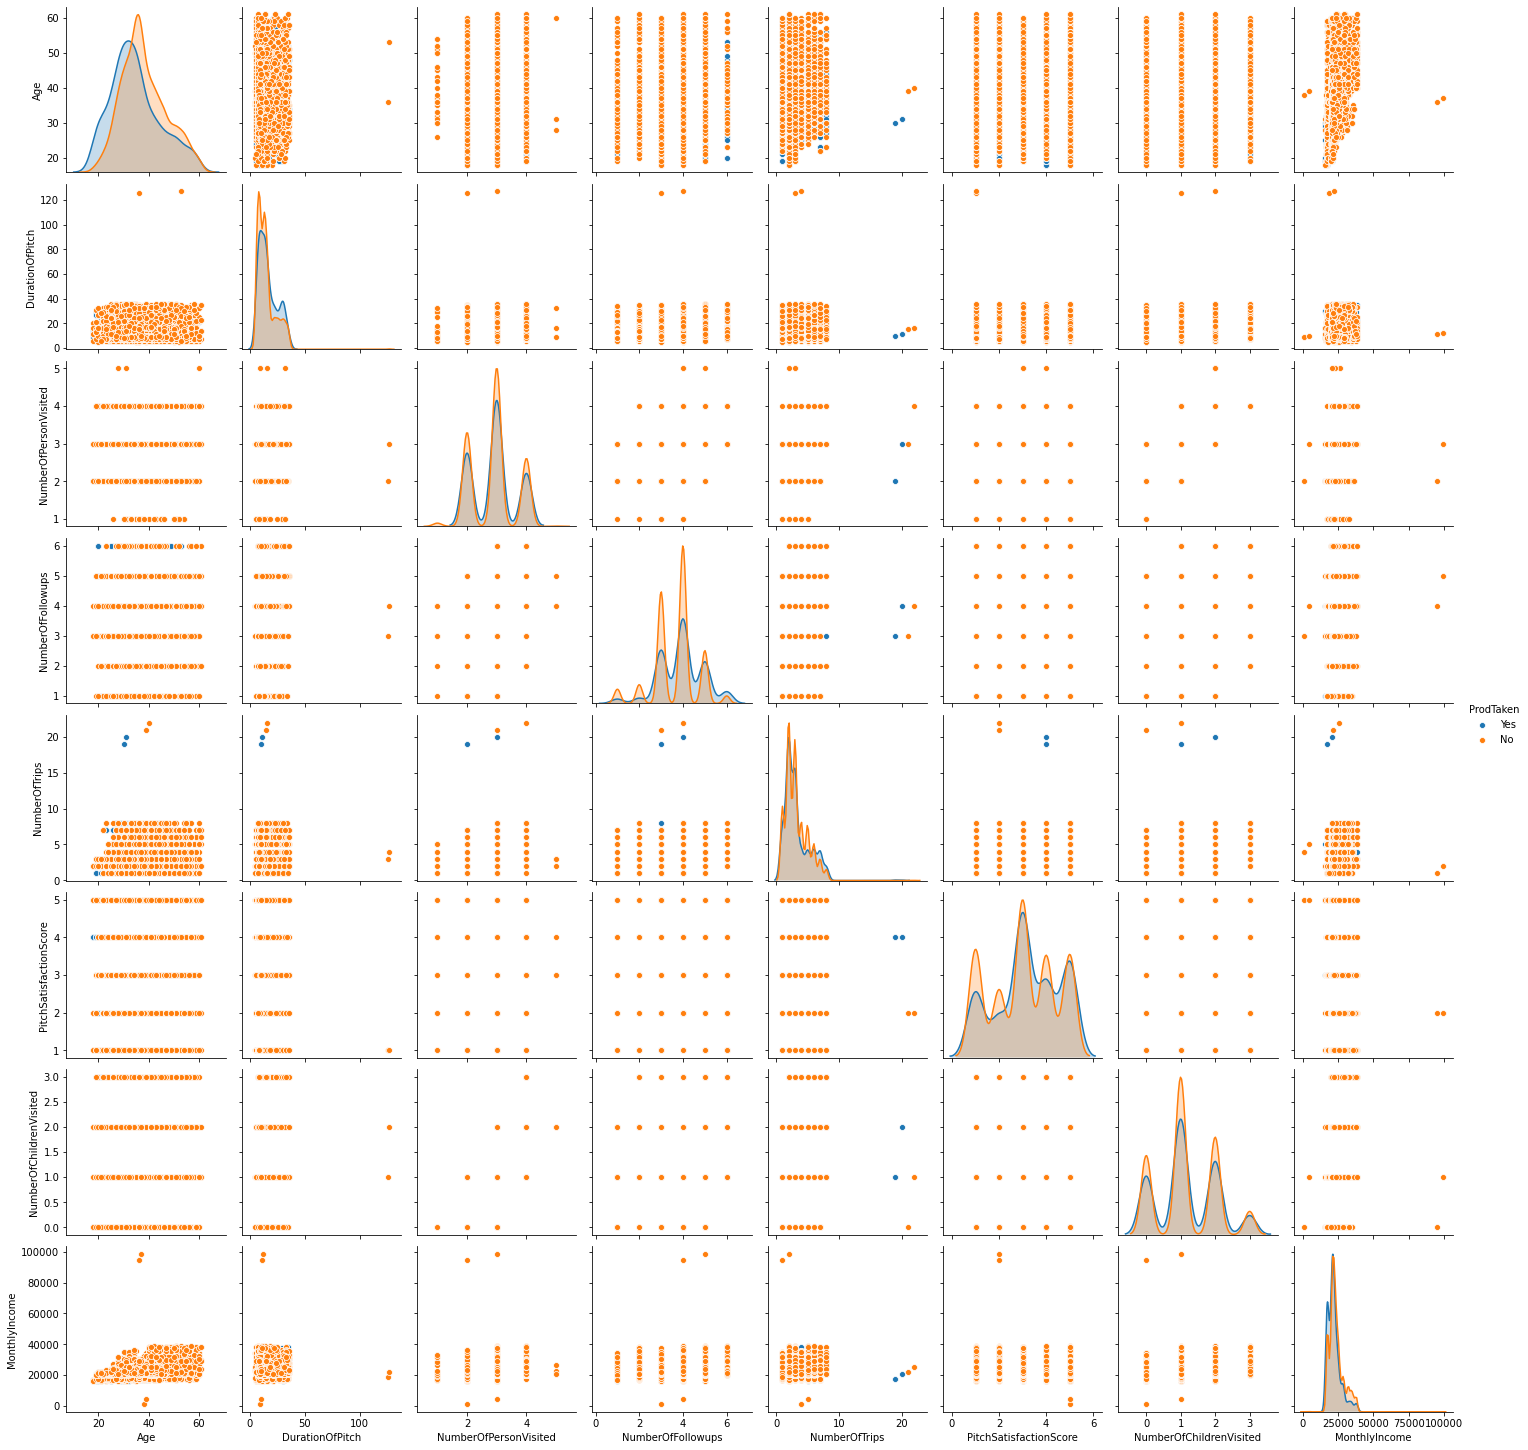

In [108]:
sns.pairplot(df_tourism2,hue='ProdTaken')

In [109]:
## there is hardly any corelation 

#### corelation plot: heatmap()

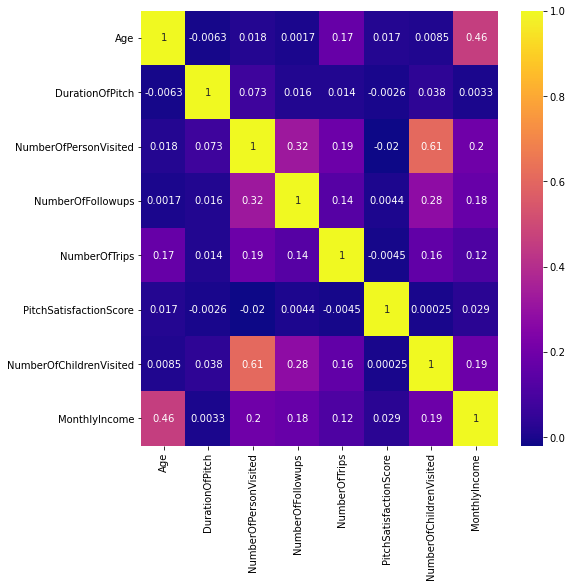

In [110]:
fig,axes = plt.subplots(figsize=(8,8))
sns.heatmap(df_tourism2.corr(),annot = True,cmap = 'plasma')

In [111]:
## there is some correlation between NumberOfChildrenVisited and NumberOfPersonVisited

#### scatter plot

Text(0.5, 1.0, 'scatter plot between Age and number of trips rgarding prouct taken')

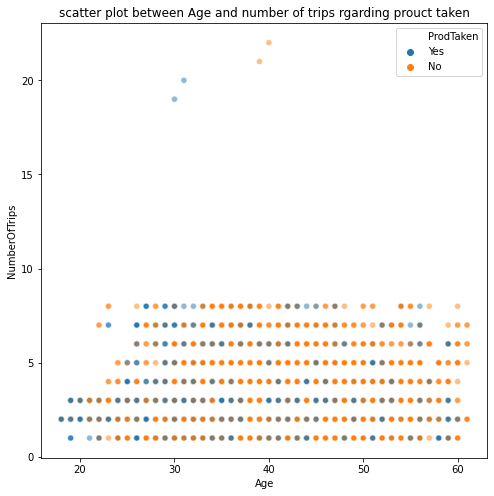

In [112]:
fig,axes = plt.subplots(figsize=(8,8))
sns.scatterplot(y = 'NumberOfTrips',x = 'Age',data = df_tourism2,hue = 'ProdTaken',alpha=0.5)
plt.title("scatter plot between Age and number of trips rgarding prouct taken")

Text(0.5, 1.0, 'scatter plot between Age and number of person visited rgarding prouct taken')

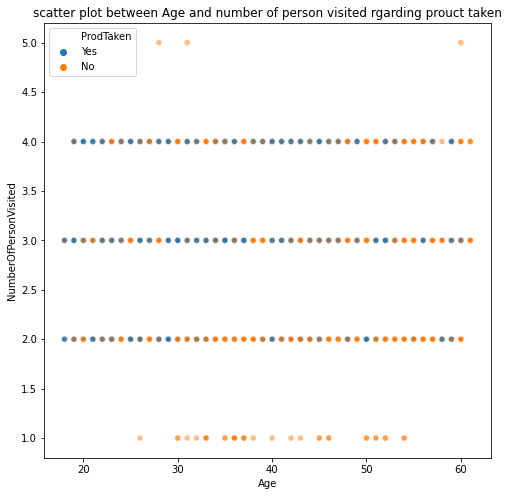

In [113]:
fig,axes = plt.subplots(figsize=(8,8))
sns.scatterplot(y = 'NumberOfPersonVisited',x = 'Age',data = df_tourism2,hue = 'ProdTaken',alpha=0.5)
plt.title("scatter plot between Age and number of person visited rgarding prouct taken")

In [114]:
## we can not find any relation

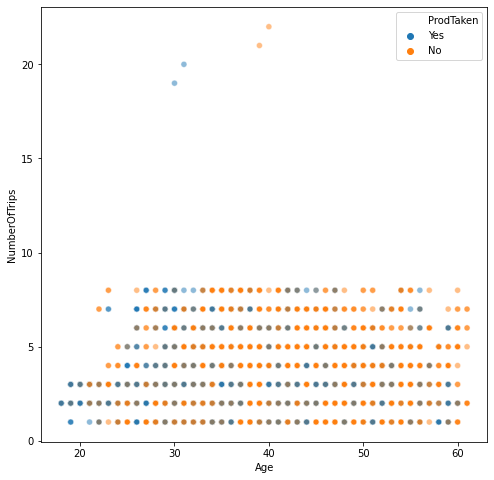

In [115]:
fig,axes = plt.subplots(figsize=(8,8))
sns.scatterplot(y = 'NumberOfTrips',x = 'Age',data = df_tourism2,hue = 'ProdTaken',alpha=0.5)

Text(0.5, 1.0, 'scatter plot between MonthlyIncome and Age rgarding ProdTaken')

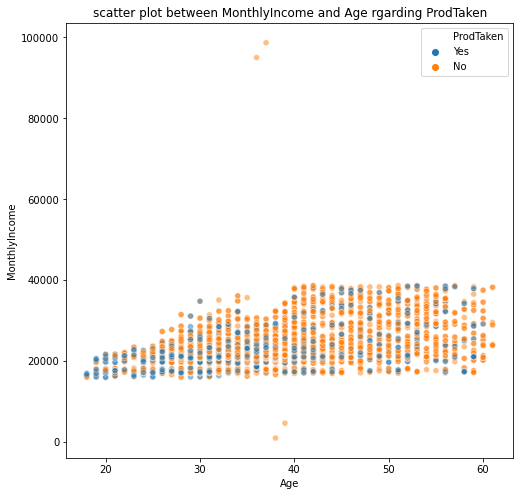

In [116]:
fig,axes = plt.subplots(figsize=(8,8))
sns.scatterplot(y = 'MonthlyIncome',x = 'Age',data = df_tourism2,hue = 'ProdTaken',alpha=0.5)
plt.title("scatter plot between MonthlyIncome and Age rgarding ProdTaken")

In [117]:
## concentration of blue dots are high at lower age group people and income range 20000-40000.
## Most of the customers that are taken product belong to young age and middle age group and they have monthy income 2000 to 40000. 

#### Distribution of age across all categorical variable and binned variable

In [118]:
#####  we are doing here customer segmentation based on age

Text(0.5, 0.98, ' distriburtion of Age across all categorical variable and binned variable')

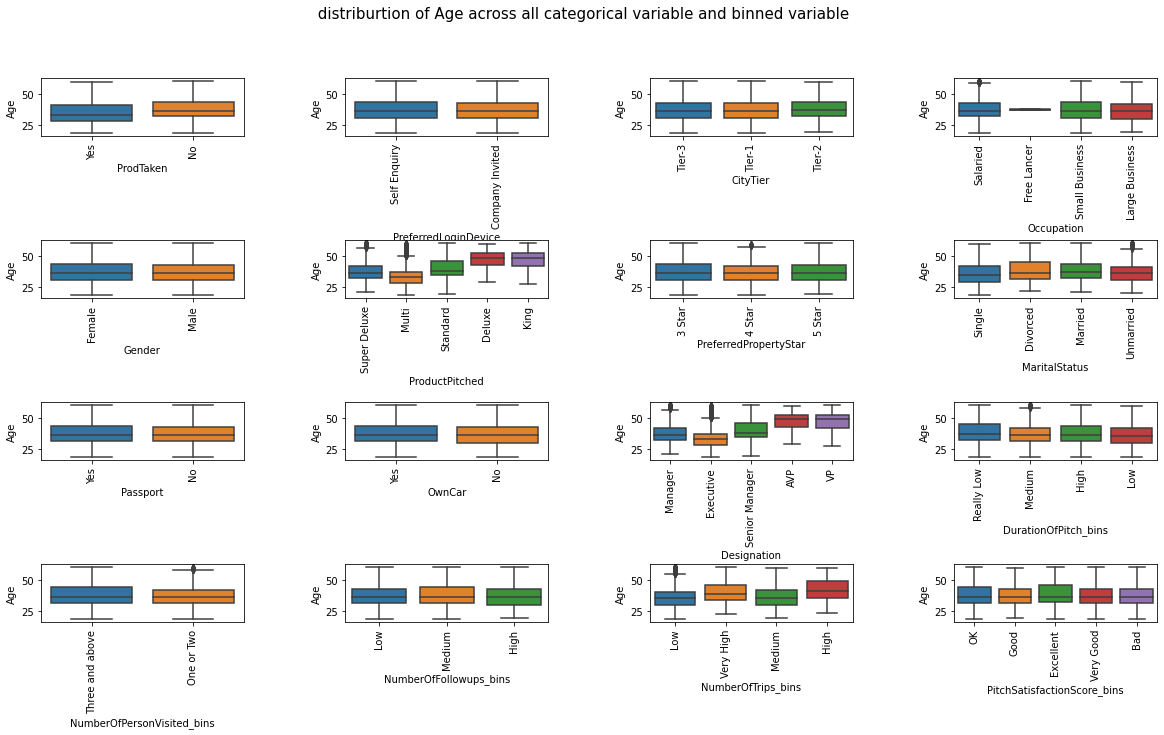

In [119]:
fig,axes=plt.subplots(4,4,figsize=(20,10))
plt.subplots_adjust(wspace=0.5,hspace=1.8)
for i,j in zip(categorical2,axes.flatten()):
    sns.boxplot(y="Age",x=i,data=df_tourism3,ax=j)
    j.set_xticklabels(df_tourism3[i].unique(),rotation=90)
fig.suptitle(" distriburtion of Age across all categorical variable and binned variable",fontsize=15)
    

                      

No handles with labels found to put in legend.


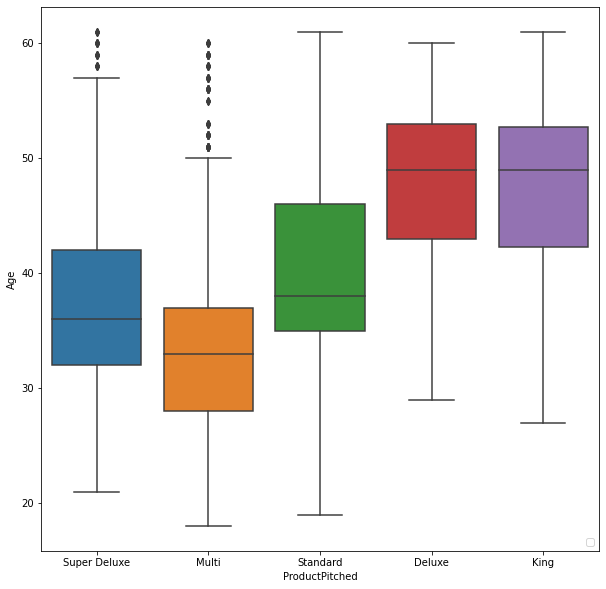

In [120]:
 fig,axes = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'ProductPitched',y = 'Age',data = df_tourism3)
axes.legend(loc='lower right')


#### Distribution of monthly income across categorical and binned variable

Text(0.5, 0.98, ' distribution of monthly income across categorical variables and binned variables')

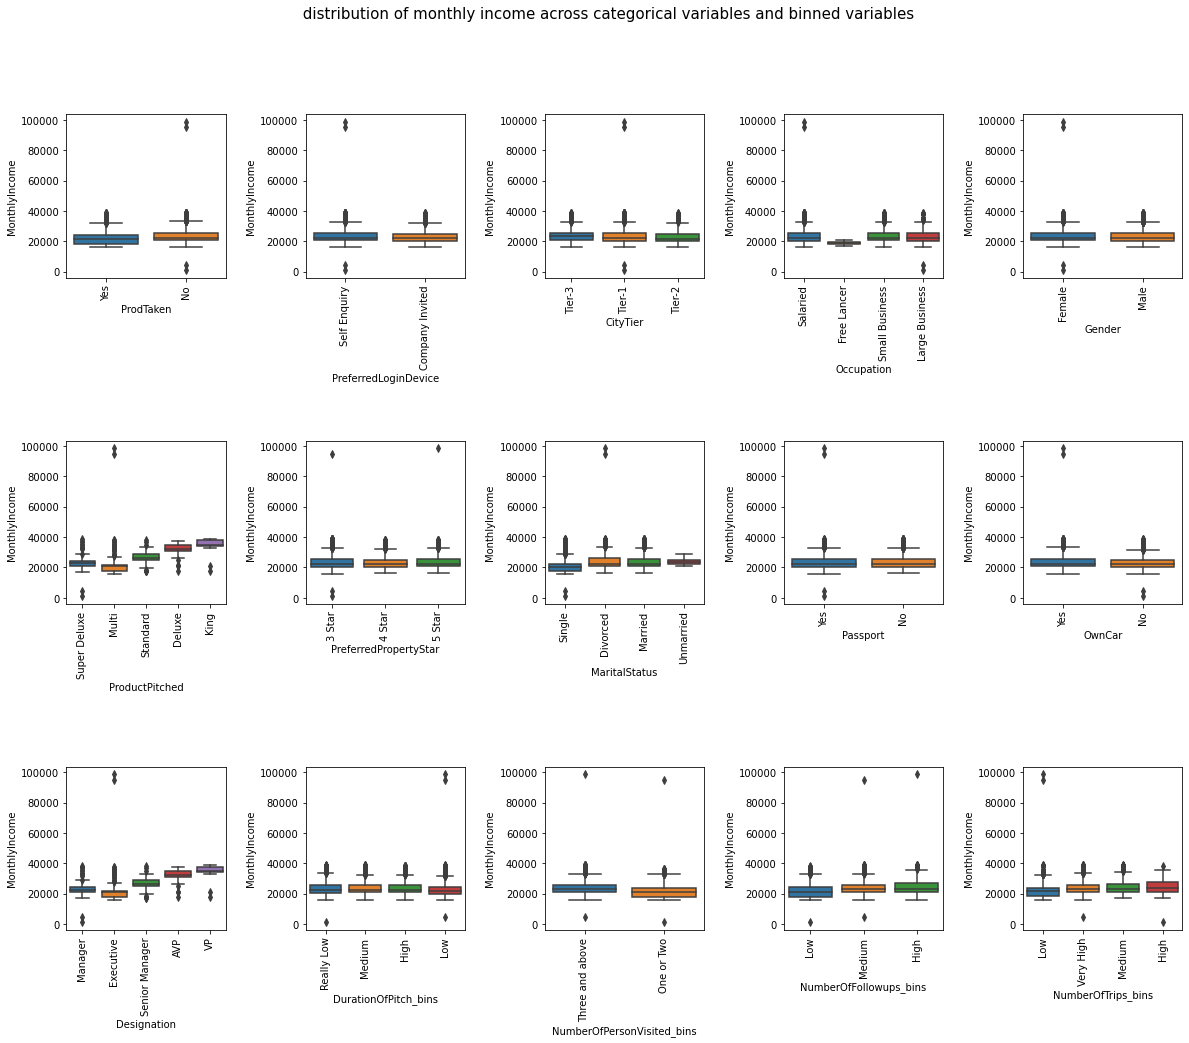

In [121]:
fig,axes = plt.subplots(3,5,figsize = (20,15))
plt.subplots_adjust(wspace=0.5,hspace=1)
for i,j in zip(categorical2,axes.flatten()):
    sns.boxplot(y = 'MonthlyIncome',x = i,data = df_tourism3,ax = j)
    j.set_xticklabels(df_tourism3[i].unique(),rotation = 90)
fig.suptitle(' distribution of monthly income across categorical variables and binned variables',fontsize=15)

No handles with labels found to put in legend.


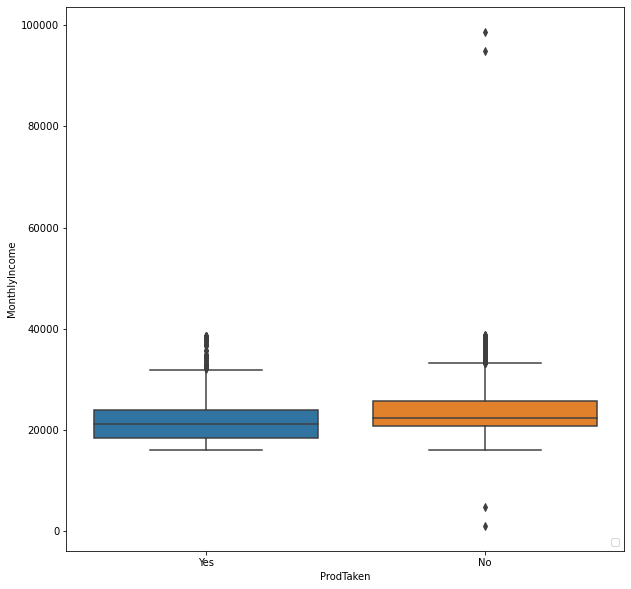

In [122]:
fig,axes = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'ProdTaken',y = 'MonthlyIncome',data=df_tourism3)
axes.legend(loc='lower right')

#### distribution of ProdTaken across all categarical and binned variables

Text(0.5, 0.98, 'Product Taken')

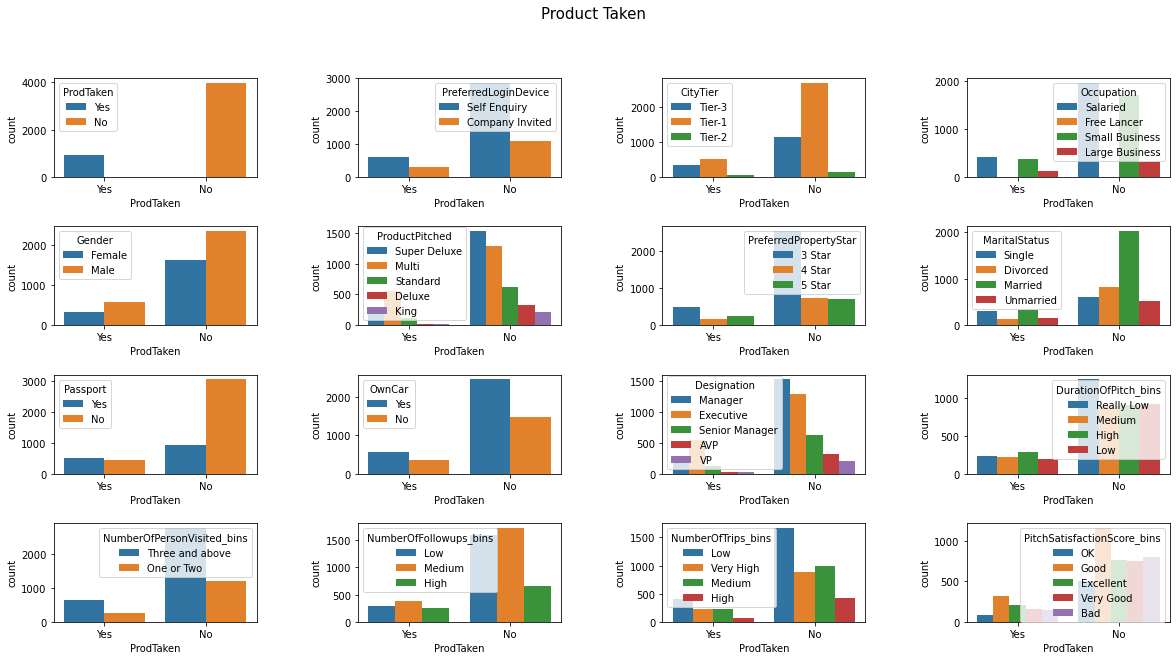

In [123]:
fig,axes = plt.subplots(4,4,figsize = (20,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i,j in zip(categorical2,axes.flatten()):
    sns.countplot(x = 'ProdTaken',hue = i,data = df_tourism3,ax = j)
fig.suptitle('Product Taken',fontsize=15)

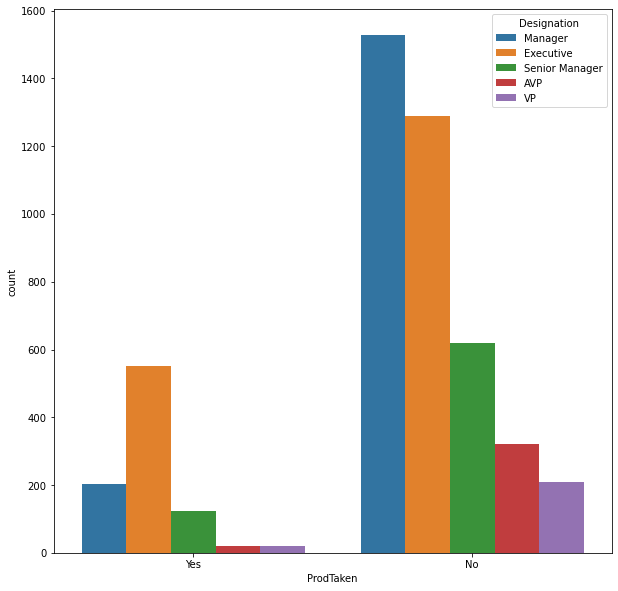

In [124]:
fig,axes = plt.subplots(figsize=(10,10))
sns.countplot(x = 'ProdTaken',data = df_tourism3,hue = 'Designation')

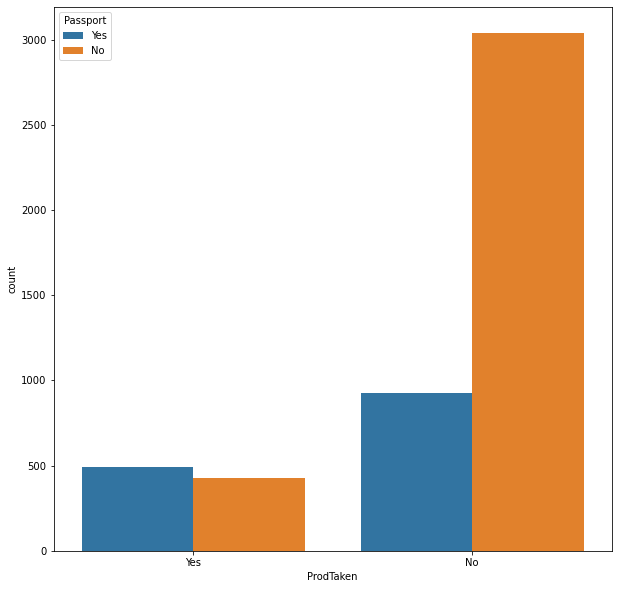

In [125]:
fig,axes = plt.subplots(figsize=(10,10))
sns.countplot(x = 'ProdTaken',data = df_tourism3,hue = 'Passport')

#### distribution of Age and ProdTaken across different categorical variables

Text(0.5, 0.98, 'Age Vs Product Taken')

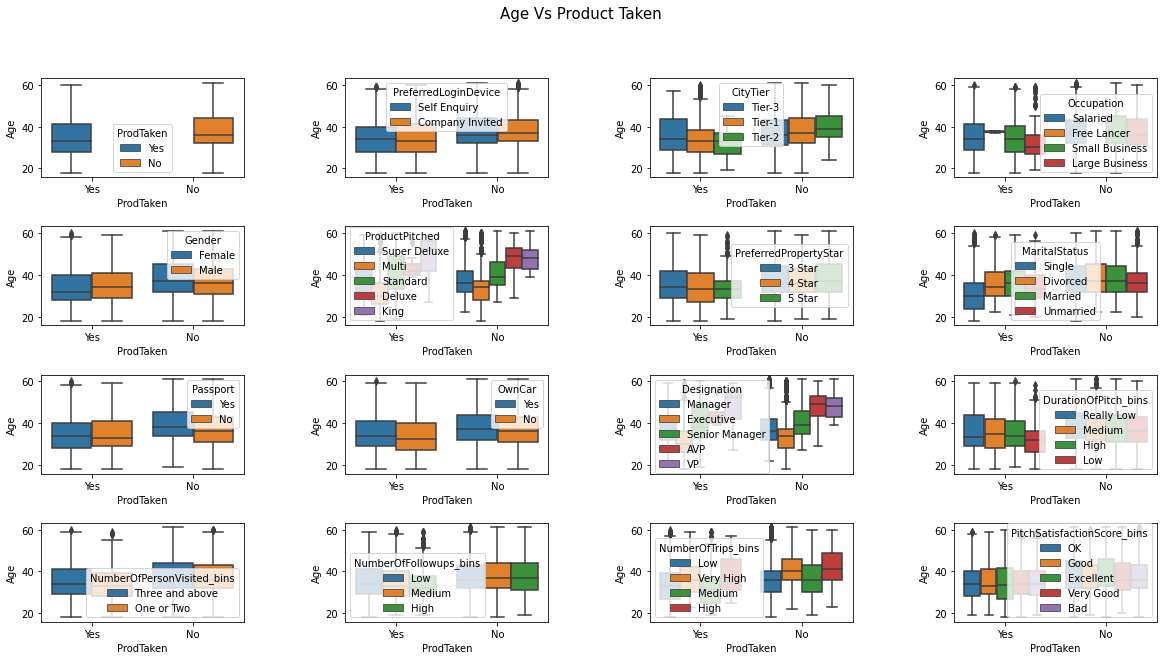

In [126]:
fig,axes = plt.subplots(4,4,figsize = (20,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i,j in zip(categorical2,axes.flatten()):
    sns.boxplot(x = 'ProdTaken',y = 'Age',data = df_tourism3,hue = i,ax = j)
fig.suptitle('Age Vs Product Taken',fontsize=15)

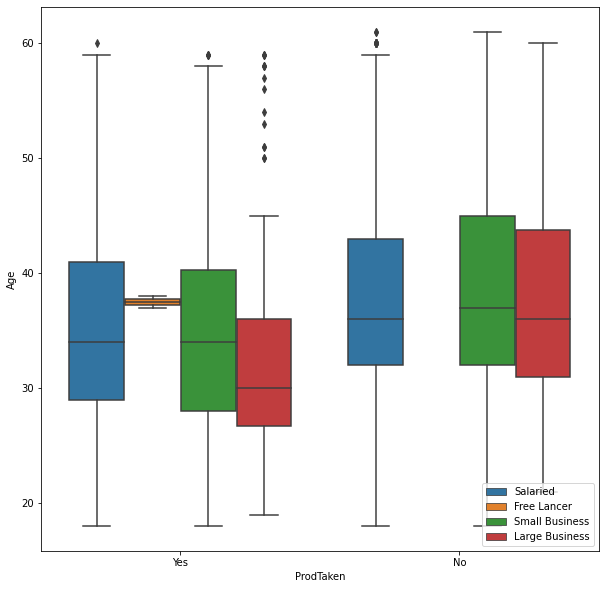

In [127]:
fig,axes = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'ProdTaken',y = 'Age',data = df_tourism3,hue = "Occupation")
axes.legend(loc='lower right')

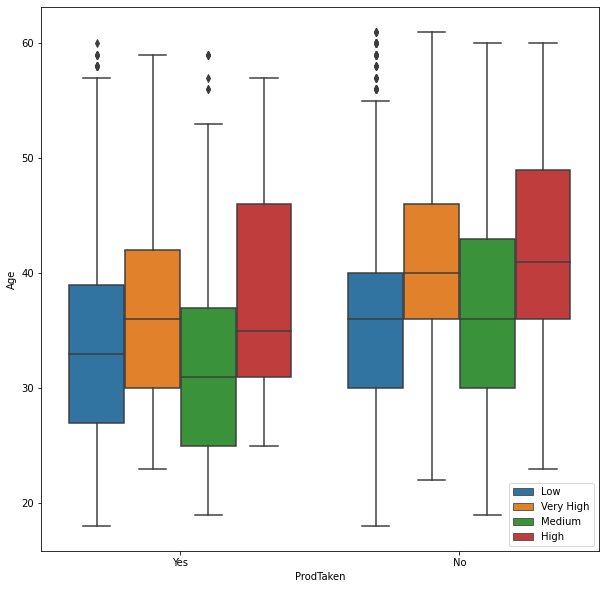

In [128]:
fig,axes = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'ProdTaken',y = 'Age',data = df_tourism3,hue = 'NumberOfTrips_bins')
axes.legend(loc = 'best')

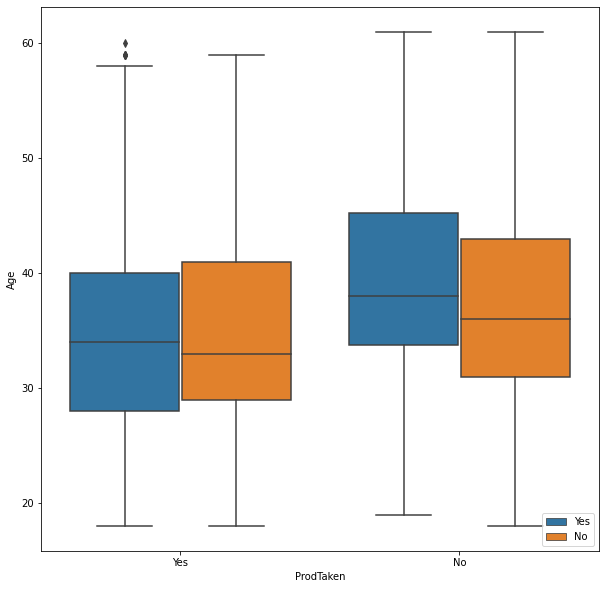

In [129]:
fig,axes = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'ProdTaken',y = 'Age',data = df_tourism3,hue = 'Passport')
axes.legend(loc = 'lower right')

In [130]:
df_tourism3[df_tourism3['Occupation'] == 'Free Lancer']

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,Age,MonthlyIncome,DurationOfPitch_bins,NumberOfPersonVisited_bins,NumberOfFollowups_bins,NumberOfTrips_bins,PitchSatisfactionScore_bins,NumberOfChildrenVisited_bins
2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,37.0,17090.0,Really Low,Three and above,Medium,Very High,Good,One
2446,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,38.0,20768.0,Really Low,Three and above,High,Very High,Good,One


#### Cluster analysis

In [131]:
df_tourism4=df_tourism2.copy()
df_tourism4.head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,MonthlyIncome
0,Yes,Self Enquiry,Tier-3,Salaried,Female,Super Deluxe,3 Star,Single,Yes,Yes,Manager,41.0,6.0,3,3.0,1.0,2,0.0,20993.0
1,No,Company Invited,Tier-1,Salaried,Male,Super Deluxe,4 Star,Divorced,No,Yes,Manager,49.0,14.0,3,4.0,2.0,3,2.0,20130.0
2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,37.0,8.0,3,4.0,7.0,3,0.0,17090.0
3,No,Company Invited,Tier-1,Salaried,Female,Multi,3 Star,Divorced,Yes,Yes,Executive,33.0,9.0,2,3.0,2.0,5,1.0,17909.0
4,No,Self Enquiry,Tier-1,Small Business,Male,Multi,4 Star,Divorced,No,Yes,Executive,36.0,8.0,2,3.0,1.0,5,0.0,18468.0


In [132]:
df_tourism4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4888 non-null   object 
 1   PreferredLoginDevice     4888 non-null   object 
 2   CityTier                 4888 non-null   object 
 3   Occupation               4888 non-null   object 
 4   Gender                   4888 non-null   object 
 5   ProductPitched           4888 non-null   object 
 6   PreferredPropertyStar    4888 non-null   object 
 7   MaritalStatus            4888 non-null   object 
 8   Passport                 4888 non-null   object 
 9   OwnCar                   4888 non-null   object 
 10  Designation              4888 non-null   object 
 11  Age                      4888 non-null   float64
 12  DurationOfPitch          4888 non-null   float64
 13  NumberOfPersonVisited    4888 non-null   int64  
 14  NumberOfFollowups       

In [133]:
df_tourism4['ProductPitched_codes'] = df_tourism4['ProductPitched'].map({'Multi':1,'Standard':2,'Deluxe':3,'Super Deluxe':4,'King':5})
df_tourism4.drop('ProductPitched',inplace=True,axis=1)
df_tourism4['PreferredPropertyStar_codes'] = df_tourism4['PreferredPropertyStar'].map({'3 Star':1,'4 Star':2,'5 Star':3})
df_tourism4.drop('PreferredPropertyStar',inplace=True,axis=1)
df_tourism4['Designation_codes'] = df_tourism4['Designation'].map({'Executive':1,'Manager':2,'Senior Manager':3,'AVP':4,'VP':5})
df_tourism4.drop('Designation',inplace=True,axis=1)

In [134]:
categorical3=list(df_tourism4.dtypes[df_tourism4.dtypes == object].index)
numerical3 = list(df_tourism4.dtypes[df_tourism4.dtypes != object].index)
df_tourism4_cat = df_tourism4[categorical3]
df_tourism4_dummies = pd.get_dummies(df_tourism4_cat)
df_tourism4_dummified = pd.concat([df_tourism4[numerical3],df_tourism4_dummies],axis=1)
df_tourism4_dummified.head()

,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,MonthlyIncome,ProductPitched_codes,PreferredPropertyStar_codes,...,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_No,Passport_Yes,OwnCar_No,OwnCar_Yes
0,41.0,6.0,3,3.0,1.0,2,0.0,20993.0,4,1,...,1,0,0,0,1,0,0,1,0,1
1,49.0,14.0,3,4.0,2.0,3,2.0,20130.0,4,2,...,0,1,1,0,0,0,1,0,0,1
2,37.0,8.0,3,4.0,7.0,3,0.0,17090.0,1,1,...,0,1,0,0,1,0,0,1,1,0
3,33.0,9.0,2,3.0,2.0,5,1.0,17909.0,1,1,...,1,0,1,0,0,0,0,1,0,1
4,36.0,8.0,2,3.0,1.0,5,0.0,18468.0,1,2,...,0,1,1,0,0,0,1,0,0,1


In [135]:
categorical3

['ProdTaken',
 'PreferredLoginDevice',
 'CityTier',
 'Occupation',
 'Gender',
 'MaritalStatus',
 'Passport',
 'OwnCar']

In [136]:
numerical3

['Age',
 'DurationOfPitch',
 'NumberOfPersonVisited',
 'NumberOfFollowups',
 'NumberOfTrips',
 'PitchSatisfactionScore',
 'NumberOfChildrenVisited',
 'MonthlyIncome',
 'ProductPitched_codes',
 'PreferredPropertyStar_codes',
 'Designation_codes']

In [137]:
df_tourism4_dummified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   4888 non-null   float64
 1   DurationOfPitch                       4888 non-null   float64
 2   NumberOfPersonVisited                 4888 non-null   int64  
 3   NumberOfFollowups                     4888 non-null   float64
 4   NumberOfTrips                         4888 non-null   float64
 5   PitchSatisfactionScore                4888 non-null   int64  
 6   NumberOfChildrenVisited               4888 non-null   float64
 7   MonthlyIncome                         4888 non-null   float64
 8   ProductPitched_codes                  4888 non-null   int64  
 9   PreferredPropertyStar_codes           4888 non-null   int64  
 10  Designation_codes                     4888 non-null   int64  
 11  ProdTaken_No     

In [138]:
### for clustering all variable should be numeric.

In [139]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_tourism4_dum_std = pd.DataFrame(std_scaler.fit_transform(df_tourism4_dummified),columns = df_tourism4_dummified.columns)
df_tourism4_dum_std.head()

,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,MonthlyIncome,ProductPitched_codes,PreferredPropertyStar_codes,...,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_No,Passport_Yes,OwnCar_No,OwnCar_Yes
0,0.379261,-1.125986,0.130966,-0.712434,-1.223399,-0.789477,-1.390153,-0.488115,1.032132,-0.725222,...,1.216019,-1.216019,-0.491161,-0.958315,2.082365,-0.402678,-1.561221,1.561221,-0.782392,0.782392
1,1.258009,-0.163906,0.130966,0.289401,-0.674727,-0.057226,0.956616,-0.652267,1.032132,0.529604,...,-0.822356,0.822356,2.035992,-0.958315,-0.480223,-0.402678,0.640524,-0.640524,-0.782392,0.782392
2,-0.060113,-0.885466,0.130966,0.289401,2.068633,-0.057226,-1.390153,-1.230508,-1.092999,-0.725222,...,-0.822356,0.822356,-0.491161,-0.958315,2.082365,-0.402678,-1.561221,1.561221,1.278132,-1.278132
3,-0.499487,-0.765206,-1.248694,-0.712434,-0.674727,1.407276,-0.216769,-1.074725,-1.092999,-0.725222,...,1.216019,-1.216019,2.035992,-0.958315,-0.480223,-0.402678,-1.561221,1.561221,-0.782392,0.782392
4,-0.169956,-0.885466,-1.248694,-0.712434,-1.223399,1.407276,-1.390153,-0.968397,-1.092999,0.529604,...,-0.822356,0.822356,2.035992,-0.958315,-0.480223,-0.402678,0.640524,-0.640524,-0.782392,0.782392


In [140]:
df_tourism4_dum_std.shape

(4888, 32)

### creating cluster using k means

In [141]:
# Create K Means cluster and store the result in the object k_means
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=2)

In [142]:
# Fit K means on the scaled_df

k_means.fit(df_tourism4_dum_std)

KMeans(n_clusters=2)

In [143]:
# Get the labels
k_means.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [144]:
k_means.inertia_

144862.19780283078

#### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [145]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_tourism4_dum_std)
k_means.inertia_

136765.50094847154

In [146]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_tourism4_dum_std)
k_means.inertia_

131354.6641731887

In [147]:
k_means = KMeans(n_clusters = 1)
k_means.fit(df_tourism4_dum_std)
k_means.inertia_

156416.00000000017

In [148]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_tourism4_dum_std)
k_means.inertia_

126551.14563638704

In [149]:
k_means = KMeans(n_clusters = 6)
k_means.fit(df_tourism4_dum_std)
k_means.inertia_

123231.4886452142

In [150]:
### Wsss reduces as k increases.

### Calculating WSS for other values of K - Elbow Method

In [151]:
wss =[]
for i in range(1,32):
    KM = KMeans(n_clusters=i)
    KM.fit(df_tourism4_dum_std)
    wss.append(KM.inertia_)

In [152]:
wss

[156416.00000000017,
 144862.19780283078,
 136850.4603864307,
 131354.4511917888,
 126566.27980907615,
 122166.35660365147,
 118362.50921432309,
 115684.75110848669,
 113986.23036969353,
 112256.39868998442,
 107891.43160498425,
 108061.87257155341,
 106801.3007203696,
 102425.35070660654,
 101787.90344168438,
 100460.46886121747,
 99717.60848751542,
 98124.5987425733,
 96546.21960547402,
 95981.63357308984,
 95321.60261480093,
 93924.31366761652,
 93920.09484303187,
 92627.99874466809,
 92155.2021610488,
 91504.51221401956,
 90606.58550143483,
 90226.59330910955,
 89462.87401421959,
 89157.37836760991,
 88435.32087338287]

## WSS plot: Elbow Curve

Text(0.5, 1.0, 'wss plot')

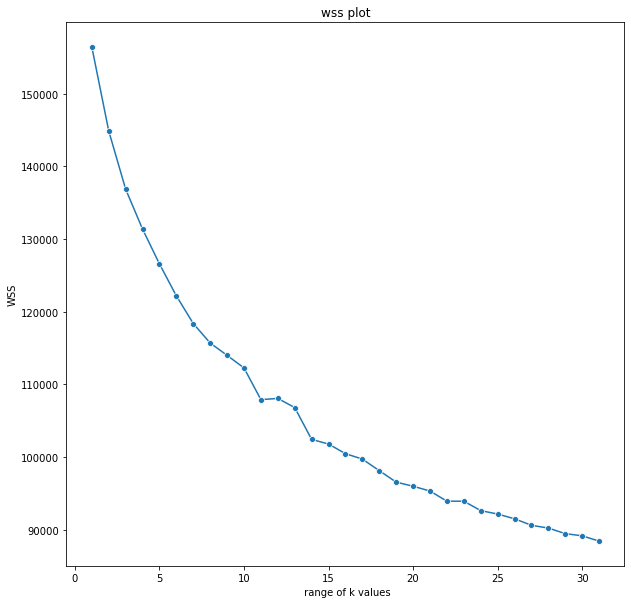

In [153]:
fig,axes = plt.subplots(figsize=(10,10))
sns.lineplot(y = wss,x = range(1,32),sort=False,marker = 'o')
plt.xlabel(" range of k values")
plt.ylabel("WSS")
plt.title("wss plot")

In [114]:
##conclusion: we can conclude here there is siginificant drop from 1to 2 and 2to 3, 3 to 4  but after3 and 4 drop is very less.
## 4 is aoptimal number of cluster here.

Text(0, 0.5, 'Silhouette score')

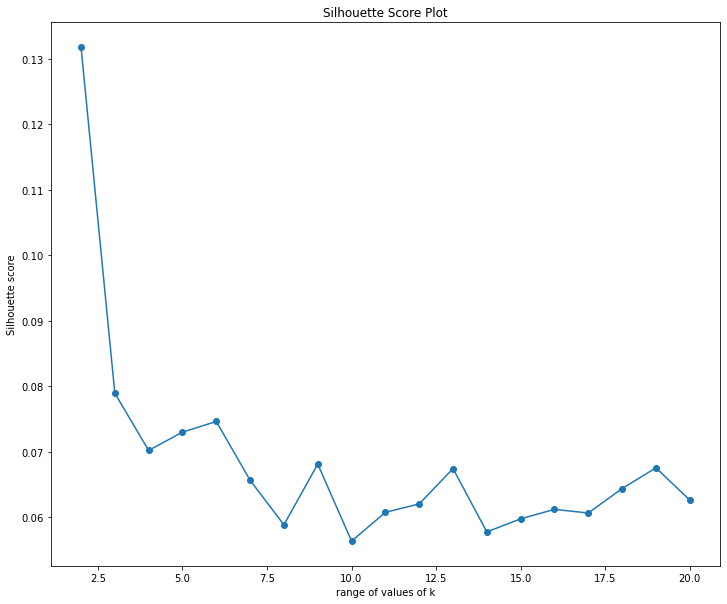

In [154]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sil_score = []
for i in range(2,21):
    k_means = KMeans(n_clusters = i,random_state=1234)
    k_means.fit(df_tourism4_dum_std)
    clus = k_means.labels_
    sil_score.append(silhouette_score(X=df_tourism4_dum_std,labels = clus))
fig,axes = plt.subplots(figsize=(12,10))
plt.plot(range(2,21),sil_score,marker='o')
axes.set_title('Silhouette Score Plot')
plt.xlabel("range of values of k")
plt.ylabel("Silhouette score")

In [155]:
knn2 = KMeans(n_clusters=5,random_state=0)
knn2.fit(df_tourism4_dum_std)
df_tourism3['Cluster'] = knn2.labels_
df_tourism2['Cluster'] = knn2.labels_

In [156]:
df_tourism3['Cluster'].unique()

array([0, 3, 4, 2, 1])

In [157]:
df_tourism3['Cluster'] = df_tourism3['Cluster'].map({0:'Cluster-1',1:'Cluster-2',2:'Cluster-3',3:'Cluster-4',4:'Cluster-5'}) 
df_tourism2['Cluster'] = df_tourism2['Cluster'].map({0:'Cluster-1',1:'Cluster-2',2:'Cluster-3',3:'Cluster-4',4:'Cluster-5'})

In [158]:
df_tourism2.head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,MonthlyIncome,Cluster
0,Yes,Self Enquiry,Tier-3,Salaried,Female,Super Deluxe,3 Star,Single,Yes,Yes,Manager,41.0,6.0,3,3.0,1.0,2,0.0,20993.0,Cluster-1
1,No,Company Invited,Tier-1,Salaried,Male,Super Deluxe,4 Star,Divorced,No,Yes,Manager,49.0,14.0,3,4.0,2.0,3,2.0,20130.0,Cluster-4
2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,37.0,8.0,3,4.0,7.0,3,0.0,17090.0,Cluster-1
3,No,Company Invited,Tier-1,Salaried,Female,Multi,3 Star,Divorced,Yes,Yes,Executive,33.0,9.0,2,3.0,2.0,5,1.0,17909.0,Cluster-4
4,No,Self Enquiry,Tier-1,Small Business,Male,Multi,4 Star,Divorced,No,Yes,Executive,36.0,8.0,2,3.0,1.0,5,0.0,18468.0,Cluster-5


In [159]:
df_tourism3.head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,Age,MonthlyIncome,DurationOfPitch_bins,NumberOfPersonVisited_bins,NumberOfFollowups_bins,NumberOfTrips_bins,PitchSatisfactionScore_bins,NumberOfChildrenVisited_bins,Cluster
0,Yes,Self Enquiry,Tier-3,Salaried,Female,Super Deluxe,3 Star,Single,Yes,Yes,Manager,41.0,20993.0,Really Low,Three and above,Low,Low,OK,One,Cluster-1
1,No,Company Invited,Tier-1,Salaried,Male,Super Deluxe,4 Star,Divorced,No,Yes,Manager,49.0,20130.0,Medium,Three and above,Medium,Low,Good,2 or more,Cluster-4
2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,37.0,17090.0,Really Low,Three and above,Medium,Very High,Good,One,Cluster-1
3,No,Company Invited,Tier-1,Salaried,Female,Multi,3 Star,Divorced,Yes,Yes,Executive,33.0,17909.0,Really Low,One or Two,Low,Low,Excellent,One,Cluster-4
4,No,Self Enquiry,Tier-1,Small Business,Male,Multi,4 Star,Divorced,No,Yes,Executive,36.0,18468.0,Really Low,One or Two,Low,Low,Excellent,One,Cluster-5


In [160]:
cat=list(df_tourism3.dtypes[df_tourism3.dtypes=='object'].index)
num=list(df_tourism3.dtypes[df_tourism3.dtypes!='object'].index)

Text(0.5, 1.0, ' MonthlyIncome vs Cluster Analysis')

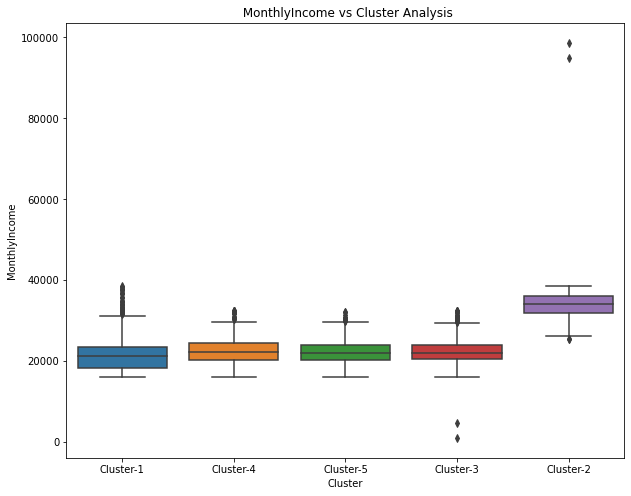

In [165]:
plt.subplots(figsize=(10,8))
sns.boxplot(x = 'Cluster',y = 'MonthlyIncome',data=df_tourism3)
plt.title(" MonthlyIncome vs Cluster Analysis")

Text(0.5, 0.98, 'Age Vs cluster analysis')

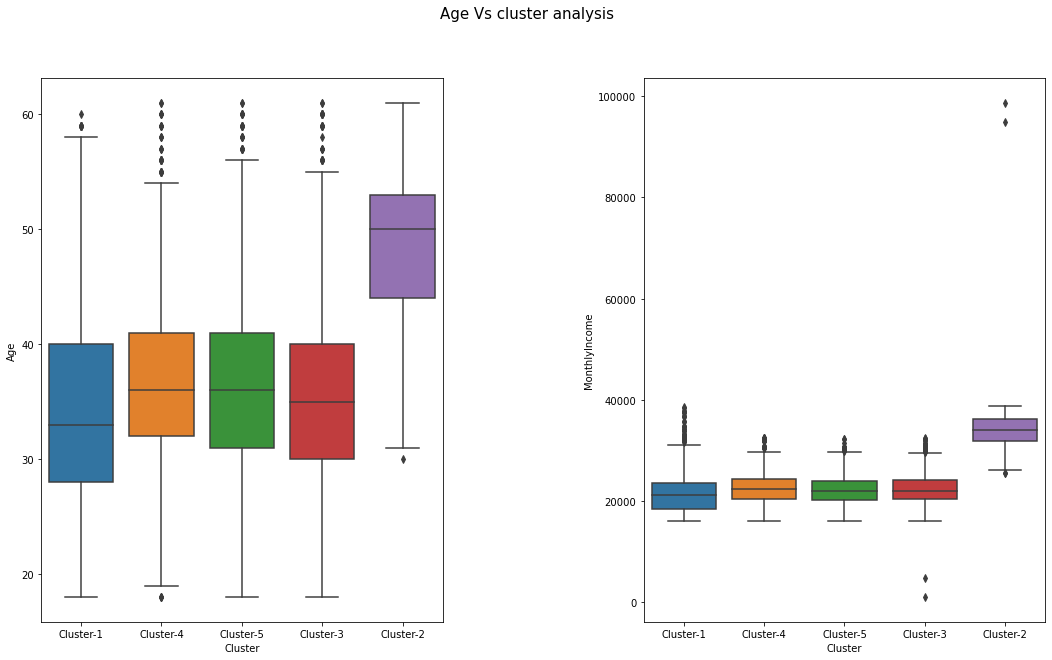

In [122]:
fig,axes = plt.subplots(1,2,figsize=(18,10))
plt.subplots_adjust(wspace=0.5)
for i,j in zip(num,axes):
    sns.boxplot(x = 'Cluster',y = i,ax=j,data=df_tourism3)
fig.suptitle('Age Vs cluster analysis',fontsize=15)   

Text(0.5, 0.98, 'cluster across categorical variables')

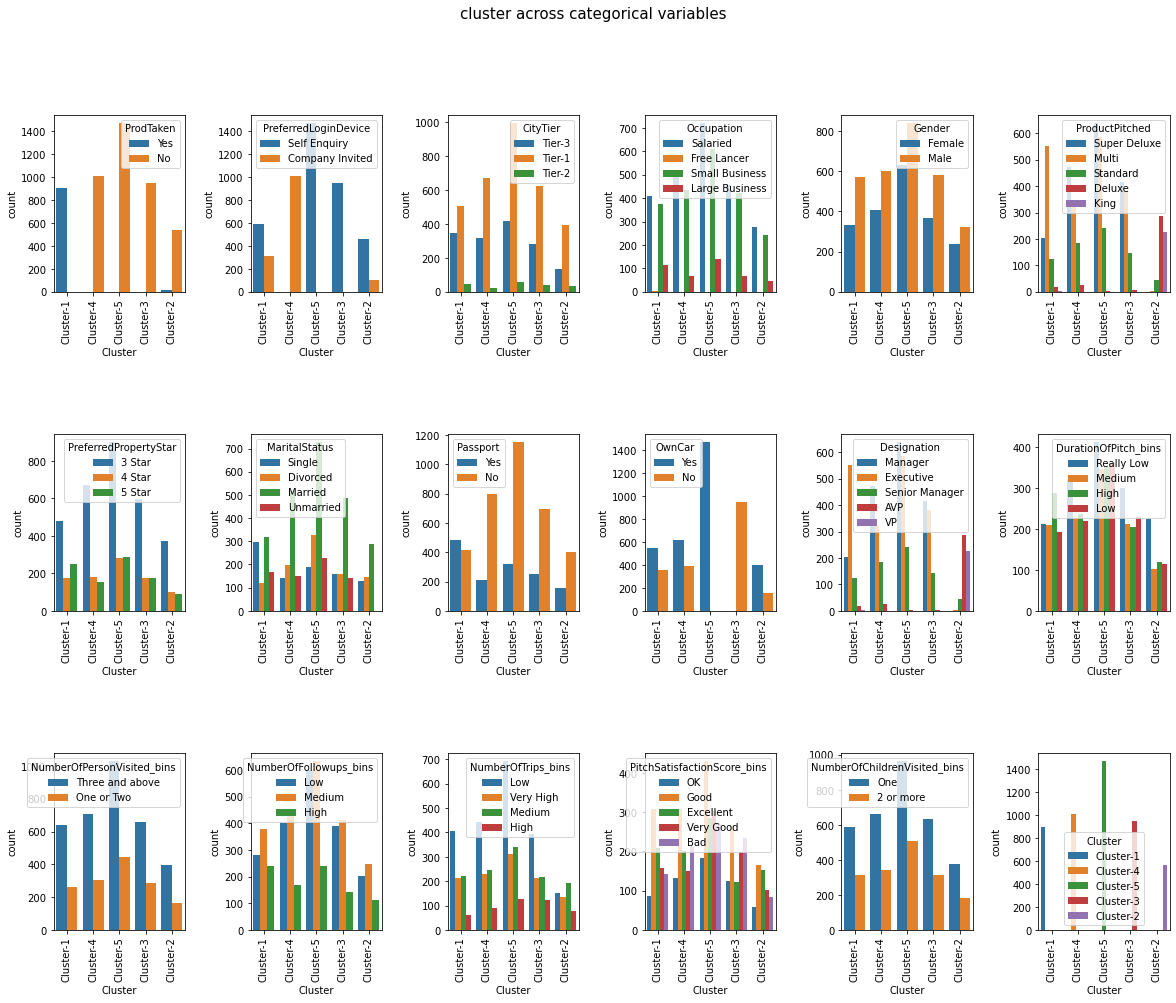

In [166]:
fig,axes = plt.subplots(3,6,figsize=(20,15))
plt.subplots_adjust(wspace=0.5,hspace=0.8)
for i,j in zip(cat,axes.flatten()):
    sns.countplot(df_tourism3['Cluster'],ax=j,hue=df_tourism3[i])
    j.set_xticklabels(list(df_tourism3['Cluster'].unique()),rotation = 90)
fig.suptitle('cluster across categorical variables',fontsize=15)    

Text(0.5, 1.0, 'Cluster vs CityTier')

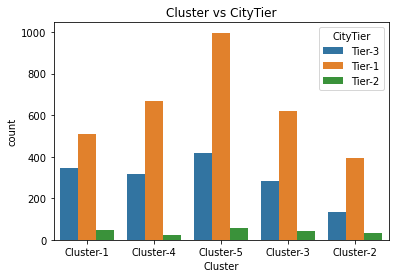

In [169]:
sns.countplot(df_tourism3['Cluster'],hue=df_tourism3["CityTier"])
plt.title("Cluster vs CityTier")

Text(0.5, 1.0, 'Cluster vs ProductPitched')

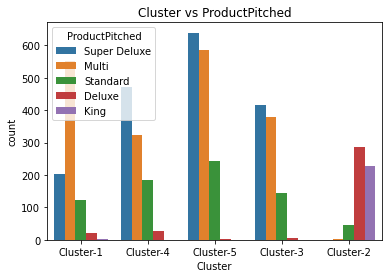

In [168]:
sns.countplot(df_tourism3['Cluster'],hue=df_tourism3["ProductPitched"])
plt.title("Cluster vs ProductPitched")

Text(0.5, 1.0, 'Cluster vs Passport')

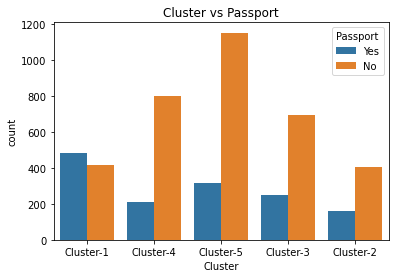

In [125]:
sns.countplot(df_tourism3['Cluster'],hue=df_tourism3['Passport'])
plt.title("Cluster vs Passport")

Text(0.5, 1.0, 'Cluster vs Passport')

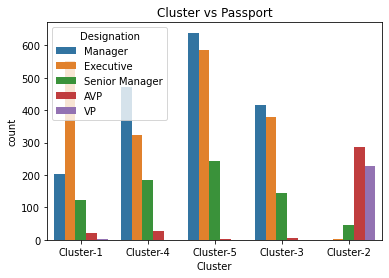

In [126]:
sns.countplot(df_tourism3['Cluster'],hue=df_tourism3['Designation'])
plt.title("Cluster vs Passport")

In [127]:
# Cluster-1 - Young Passport Holders - Product Propensity High
df_tourism3[df_tourism3['Cluster']=='Cluster-1'].head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,Age,MonthlyIncome,DurationOfPitch_bins,NumberOfPersonVisited_bins,NumberOfFollowups_bins,NumberOfTrips_bins,PitchSatisfactionScore_bins,NumberOfChildrenVisited_bins,Cluster
0,Yes,Self Enquiry,Tier-3,Salaried,Female,Super Deluxe,3 Star,Single,Yes,Yes,Manager,41.0,20993.0,Really Low,Three and above,Low,Low,OK,One,Cluster-1
2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,37.0,17090.0,Really Low,Three and above,Medium,Very High,Good,One,Cluster-1
14,Yes,Self Enquiry,Tier-1,Salaried,Male,Multi,3 Star,Single,Yes,No,Executive,28.0,17028.0,High,One or Two,Medium,Very High,OK,One,Cluster-1
21,Yes,Self Enquiry,Tier-3,Salaried,Male,Super Deluxe,5 Star,Single,No,No,Manager,36.0,18407.0,Medium,One or Two,Medium,Low,OK,One,Cluster-1
24,Yes,Self Enquiry,Tier-1,Small Business,Male,Multi,5 Star,Single,No,Yes,Executive,34.0,17960.0,Low,One or Two,Low,Medium,OK,One,Cluster-1


In [128]:
# Cluster-2 - Older age group people and very few people have passport - Product Propensity low
df_tourism3[df_tourism3['Cluster']=='Cluster-2'].head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,Age,MonthlyIncome,DurationOfPitch_bins,NumberOfPersonVisited_bins,NumberOfFollowups_bins,NumberOfTrips_bins,PitchSatisfactionScore_bins,NumberOfChildrenVisited_bins,Cluster
18,No,Self Enquiry,Tier-3,Salaried,Female,Deluxe,3 Star,Divorced,No,Yes,AVP,53.0,30427.0,Really Low,Three and above,Medium,Medium,Good,One,Cluster-2
25,No,Self Enquiry,Tier-1,Salaried,Female,King,3 Star,Married,No,No,VP,53.0,34094.0,Low,One or Two,Low,Very High,Excellent,One,Cluster-2
29,No,Self Enquiry,Tier-3,Small Business,Female,King,5 Star,Single,No,No,VP,46.0,33947.0,Really Low,One or Two,Low,High,OK,One,Cluster-2
38,No,Self Enquiry,Tier-1,Salaried,Female,Multi,3 Star,Divorced,Yes,Yes,Executive,36.0,95000.0,Low,One or Two,Medium,Low,OK,One,Cluster-2
45,Yes,Self Enquiry,Tier-1,Large Business,Female,King,3 Star,Divorced,No,Yes,VP,41.0,34545.0,Medium,One or Two,Low,Low,Very Good,One,Cluster-2


In [129]:
# Cluster-3 - group of younger and middle age customers and very few people have passport - Product Propensity very very low
df_tourism3[df_tourism3['Cluster']=='Cluster-3'].head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,Age,MonthlyIncome,DurationOfPitch_bins,NumberOfPersonVisited_bins,NumberOfFollowups_bins,NumberOfTrips_bins,PitchSatisfactionScore_bins,NumberOfChildrenVisited_bins,Cluster
7,No,Self Enquiry,Tier-1,Salaried,Male,Multi,3 Star,Married,No,No,Executive,30.0,17693.0,High,Three and above,Low,Low,OK,One,Cluster-3
11,No,Self Enquiry,Tier-1,Salaried,Female,Super Deluxe,3 Star,Single,Yes,No,Manager,36.0,22347.0,High,One or Two,Medium,Low,Good,One,Cluster-3
12,No,Self Enquiry,Tier-1,Salaried,Male,Multi,3 Star,Married,No,No,Executive,31.0,17911.0,High,One or Two,Low,Low,Good,One,Cluster-3
13,No,Self Enquiry,Tier-1,Small Business,Male,Multi,3 Star,Married,No,No,Executive,34.0,17661.0,High,Three and above,Low,Low,Good,2 or more,Cluster-3
19,No,Self Enquiry,Tier-1,Salaried,Male,Multi,3 Star,Single,Yes,No,Executive,36.0,22347.0,Really Low,One or Two,Low,Very High,Very Good,One,Cluster-3


In [130]:
# Cluster-4 - group of younger and middle age customers and very few people have passport and customer - Product Propensity very low
df_tourism3[df_tourism3['Cluster']=='Cluster-4'].head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,Age,MonthlyIncome,DurationOfPitch_bins,NumberOfPersonVisited_bins,NumberOfFollowups_bins,NumberOfTrips_bins,PitchSatisfactionScore_bins,NumberOfChildrenVisited_bins,Cluster
1,No,Company Invited,Tier-1,Salaried,Male,Super Deluxe,4 Star,Divorced,No,Yes,Manager,49.0,20130.0,Medium,Three and above,Medium,Low,Good,2 or more,Cluster-4
3,No,Company Invited,Tier-1,Salaried,Female,Multi,3 Star,Divorced,Yes,Yes,Executive,33.0,17909.0,Really Low,One or Two,Low,Low,Excellent,One,Cluster-4
5,No,Company Invited,Tier-1,Salaried,Male,Multi,3 Star,Single,No,Yes,Executive,32.0,18068.0,Really Low,Three and above,Low,Low,Excellent,One,Cluster-4
8,No,Company Invited,Tier-1,Salaried,Male,Standard,3 Star,Unmarried,No,No,Senior Manager,38.0,24526.0,High,One or Two,Medium,Low,Good,One,Cluster-4
17,No,Company Invited,Tier-1,Small Business,Male,Multi,3 Star,Married,Yes,No,Executive,22.0,17935.0,High,Three and above,Low,Low,Good,One,Cluster-4


In [131]:
## Cluster-5 - group of younger and middle age customers and very few people have passport and customer's monthly income are low 
## Product Propensity very very low
df_tourism3[df_tourism3['Cluster']=='Cluster-5'].head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,Age,MonthlyIncome,DurationOfPitch_bins,NumberOfPersonVisited_bins,NumberOfFollowups_bins,NumberOfTrips_bins,PitchSatisfactionScore_bins,NumberOfChildrenVisited_bins,Cluster
4,No,Self Enquiry,Tier-1,Small Business,Male,Multi,4 Star,Divorced,No,Yes,Executive,36.0,18468.0,Really Low,One or Two,Low,Low,Excellent,One,Cluster-5
6,No,Self Enquiry,Tier-1,Small Business,Female,Multi,5 Star,Divorced,Yes,Yes,Executive,59.0,17670.0,Really Low,One or Two,Low,Very High,OK,One,Cluster-5
9,No,Self Enquiry,Tier-1,Small Business,Male,Super Deluxe,3 Star,Divorced,No,Yes,Manager,36.0,20237.0,High,Three and above,Low,Very High,Good,One,Cluster-5
10,No,Self Enquiry,Tier-1,Small Business,Male,Multi,4 Star,Divorced,No,Yes,Executive,35.0,17426.0,High,One or Two,Low,Low,Good,One,Cluster-5
15,No,Self Enquiry,Tier-1,Salaried,Female,Standard,5 Star,Married,No,Yes,Senior Manager,29.0,24980.0,High,One or Two,Low,Low,Excellent,One,Cluster-5


#### conclusion and recommendation

The data set is imbalanced because the no of 0’s (No) is more than 1’s(Yes) in the target variables ProdTaken. We should do under
sampling and oversampling technique. We can also use SMOTE to remove imbalance data set problem. All these techniques are very 
important for handling imbalance data set problem. If the model is predicting more 0’s then 1’s , then model performance will
decrease.


Cluster-1 is the group of younger people who have passport also. For business perspective Travel Company should target these
people for selling the product. Also thought of some strategy so that non passport holder can get passport so that propensity
of product could increase.


In [1]:
##### Part-2

### Modeling Part

In [238]:
df_tourism5=df_tourism2.copy()
df_tourism5.head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,CustomerID,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,MonthlyIncome
0,Yes,Self Enquiry,Tier-3,Salaried,Female,Super Deluxe,3 Star,Single,Yes,Yes,Manager,200000,41.0,6.0,3,3.0,1.0,2,0.0,20993.0
1,No,Company Invited,Tier-1,Salaried,Male,Super Deluxe,4 Star,Divorced,No,Yes,Manager,200001,49.0,14.0,3,4.0,2.0,3,2.0,20130.0
2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,200002,37.0,8.0,3,4.0,7.0,3,0.0,17090.0
3,No,Company Invited,Tier-1,Salaried,Female,Multi,3 Star,Divorced,Yes,Yes,Executive,200003,33.0,9.0,2,3.0,2.0,5,1.0,17909.0
4,No,Self Enquiry,Tier-1,Small Business,Male,Multi,4 Star,Divorced,No,Yes,Executive,200004,36.0,8.0,2,3.0,1.0,5,0.0,18468.0


In [239]:
df_tourism5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4888 non-null   object 
 1   PreferredLoginDevice     4888 non-null   object 
 2   CityTier                 4888 non-null   object 
 3   Occupation               4888 non-null   object 
 4   Gender                   4888 non-null   object 
 5   ProductPitched           4888 non-null   object 
 6   PreferredPropertyStar    4888 non-null   object 
 7   MaritalStatus            4888 non-null   object 
 8   Passport                 4888 non-null   object 
 9   OwnCar                   4888 non-null   object 
 10  Designation              4888 non-null   object 
 11  CustomerID               4888 non-null   int64  
 12  Age                      4888 non-null   float64
 13  DurationOfPitch          4888 non-null   float64
 14  NumberOfPersonVisited   

In [240]:
df_tourism5['ProductPitched_codes'] = df_tourism5['ProductPitched'].map({'Multi':1,'Standard':2,'Deluxe':3,'Super Deluxe':4,'King':5})
df_tourism5.drop('ProductPitched',inplace=True,axis=1)
df_tourism5['PreferredPropertyStar_codes'] = df_tourism5['PreferredPropertyStar'].map({'3 Star':1,'4 Star':2,'5 Star':3})
df_tourism5.drop('PreferredPropertyStar',inplace=True,axis=1)
df_tourism5['Designation_codes'] = df_tourism5['Designation'].map({'Executive':1,'Manager':2,'Senior Manager':3,'AVP':4,'VP':5})
df_tourism5.drop('Designation',inplace=True,axis=1)

In [241]:
categorical3=list(df_tourism4.dtypes[df_tourism4.dtypes == object].index)
numerical3 = list(df_tourism4.dtypes[df_tourism4.dtypes != object].index)

In [242]:
for categorical3 in df_tourism5.columns:
    if df_tourism5[categorical3].dtypes=="object":
         df_tourism5[categorical3]=pd.Categorical(df_tourism5[categorical3]).codes

In [244]:
df_tourism5.head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,MaritalStatus,Passport,OwnCar,CustomerID,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,MonthlyIncome,ProductPitched_codes,PreferredPropertyStar_codes,Designation_codes
0,1,1,2,2,1,2,1,1,200000,41.0,6.0,3,3.0,1.0,2,0.0,20993.0,4,1,2
1,0,0,0,2,2,0,0,1,200001,49.0,14.0,3,4.0,2.0,3,2.0,20130.0,4,2,2
2,1,1,0,0,2,2,1,0,200002,37.0,8.0,3,4.0,7.0,3,0.0,17090.0,1,1,1
3,0,0,0,2,1,0,1,1,200003,33.0,9.0,2,3.0,2.0,5,1.0,17909.0,1,1,1
4,0,1,0,3,2,0,0,1,200004,36.0,8.0,2,3.0,1.0,5,0.0,18468.0,1,2,1


#### train Test split

In [76]:
### create independent and dependent set
X=df_tourism5.drop("ProdTaken",axis=1)
y=df_tourism5.pop("ProdTaken")

NameError: name 'df_tourism5' is not defined

In [246]:
### spli the data into 70-30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)


#### Logistic regression model

In [247]:
# Fit the Logistic Regression model
model=LogisticRegression(solver="newton-cg",max_iter=10000,verbose=True,n_jobs=2,random_state=0)
model.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, random_state=0, solver='newton-cg',
                   verbose=True)

In [131]:
## prediction on train and test set

In [248]:
ytrainpredict=model.predict(X_train)
ytestpredict=model.predict(X_test)

In [249]:
### getting predicted classes and probs

In [250]:
ytrainpredict_prob=model.predict_proba(X_train)
ytrainpredict_prob

array([[0.90643443, 0.09356557],
       [0.9255232 , 0.0744768 ],
       [0.81351405, 0.18648595],
       ...,
       [0.88817014, 0.11182986],
       [0.85500017, 0.14499983],
       [0.43878176, 0.56121824]])

In [251]:
pd.DataFrame(ytrainpredict_prob).head()

,0,1
0,0.906434,0.093566
1,0.925523,0.074477
2,0.813514,0.186486
3,0.830107,0.169893
4,0.981321,0.018679


In [252]:
## model evalution

In [253]:
## for train set
model.score(X_train,y_train)

0.8477053493130664

AUC: 0.815


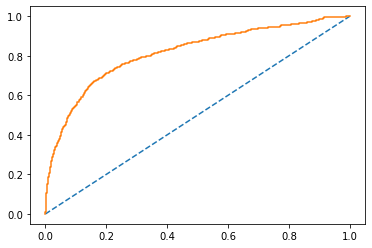

In [254]:
### AUC and ROC for the training data
# predict probabilities
ytrainpredict_prob = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrainpredict_prob=ytrainpredict_prob[:,1]
# calculate AUC
train_auc = roc_auc_score(y_train, ytrainpredict_prob)
print('AUC: %.3f' % train_auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,ytrainpredict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [255]:
confusion_matrix(y_train, ytrainpredict)

array([[2686,   87],
       [ 434,  214]], dtype=int64)

In [256]:
print(classification_report(y_train, ytrainpredict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2773
           1       0.71      0.33      0.45       648

    accuracy                           0.85      3421
   macro avg       0.79      0.65      0.68      3421
weighted avg       0.83      0.85      0.82      3421



In [257]:
### for test set

In [258]:
model.score(X_test,y_test)

0.8391274710293115

In [259]:
### AUC and ROC curve for test set

AUC: 0.769


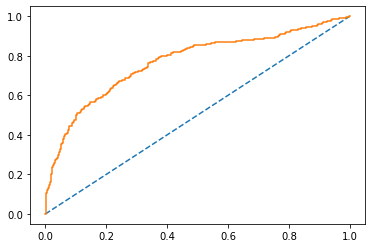

In [260]:
# predict probabilities
ytestpredict_prob = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytestpredict_prob = ytestpredict_prob[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, ytestpredict_prob)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, ytestpredict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [261]:
confusion_matrix(y_test, ytestpredict)

array([[1169,   26],
       [ 210,   62]], dtype=int64)

In [262]:
print(classification_report(y_test, ytestpredict))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1195
           1       0.70      0.23      0.34       272

    accuracy                           0.84      1467
   macro avg       0.78      0.60      0.63      1467
weighted avg       0.82      0.84      0.80      1467



#### df_tourism6:feature engineering

In [135]:
df_tourism6=df_tourism3.copy()

In [136]:
df_tourism6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ProdTaken                     4888 non-null   object 
 1   PreferredLoginDevice          4888 non-null   object 
 2   CityTier                      4888 non-null   object 
 3   Occupation                    4888 non-null   object 
 4   Gender                        4888 non-null   object 
 5   ProductPitched                4888 non-null   object 
 6   PreferredPropertyStar         4888 non-null   object 
 7   MaritalStatus                 4888 non-null   object 
 8   Passport                      4888 non-null   object 
 9   OwnCar                        4888 non-null   object 
 10  Designation                   4888 non-null   object 
 11  Age                           4888 non-null   float64
 12  MonthlyIncome                 4888 non-null   float64
 13  Dur

In [137]:
df_tourism6['ProductPitched_codes'] = df_tourism6['ProductPitched'].map({'Multi':1,'Standard':2,'Deluxe':3,'Super Deluxe':4,'King':5})
df_tourism6.drop('ProductPitched',inplace=True,axis=1)
df_tourism6['PreferredPropertyStar_codes'] = df_tourism6['PreferredPropertyStar'].map({'3 Star':1,'4 Star':2,'5 Star':3})
df_tourism6.drop('PreferredPropertyStar',inplace=True,axis=1)
df_tourism6['Designation_codes'] = df_tourism6['Designation'].map({'Executive':1,'Manager':2,'Senior Manager':3,'AVP':4,'VP':5})
df_tourism6.drop('Designation',inplace=True,axis=1)

In [138]:
df_tourism6.head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,MaritalStatus,Passport,OwnCar,Age,MonthlyIncome,DurationOfPitch_bins,NumberOfPersonVisited_bins,NumberOfFollowups_bins,NumberOfTrips_bins,PitchSatisfactionScore_bins,NumberOfChildrenVisited_bins,ProductPitched_codes,PreferredPropertyStar_codes,Designation_codes
0,Yes,Self Enquiry,Tier-3,Salaried,Female,Single,Yes,Yes,41.0,20993.0,Really Low,Three and above,Low,Low,OK,One,4,1,2
1,No,Company Invited,Tier-1,Salaried,Male,Divorced,No,Yes,49.0,20130.0,Medium,Three and above,Medium,Low,Good,2 or more,4,2,2
2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Single,Yes,No,37.0,17090.0,Really Low,Three and above,Medium,Very High,Good,One,1,1,1
3,No,Company Invited,Tier-1,Salaried,Female,Divorced,Yes,Yes,33.0,17909.0,Really Low,One or Two,Low,Low,Excellent,One,1,1,1
4,No,Self Enquiry,Tier-1,Small Business,Male,Divorced,No,Yes,36.0,18468.0,Really Low,One or Two,Low,Low,Excellent,One,1,2,1


In [139]:
df_tourism6['NumberOfTrips_num'] = df_tourism6['NumberOfTrips_bins'].map({'Low':1,'Medium':2,'High':3,'Very High':4})
df_tourism6.drop('NumberOfTrips_bins',inplace=True,axis=1)

In [140]:
df_tourism6.head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,MaritalStatus,Passport,OwnCar,Age,MonthlyIncome,DurationOfPitch_bins,NumberOfPersonVisited_bins,NumberOfFollowups_bins,PitchSatisfactionScore_bins,NumberOfChildrenVisited_bins,ProductPitched_codes,PreferredPropertyStar_codes,Designation_codes,NumberOfTrips_num
0,Yes,Self Enquiry,Tier-3,Salaried,Female,Single,Yes,Yes,41.0,20993.0,Really Low,Three and above,Low,OK,One,4,1,2,1
1,No,Company Invited,Tier-1,Salaried,Male,Divorced,No,Yes,49.0,20130.0,Medium,Three and above,Medium,Good,2 or more,4,2,2,1
2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Single,Yes,No,37.0,17090.0,Really Low,Three and above,Medium,Good,One,1,1,1,4
3,No,Company Invited,Tier-1,Salaried,Female,Divorced,Yes,Yes,33.0,17909.0,Really Low,One or Two,Low,Excellent,One,1,1,1,1
4,No,Self Enquiry,Tier-1,Small Business,Male,Divorced,No,Yes,36.0,18468.0,Really Low,One or Two,Low,Excellent,One,1,2,1,1


In [141]:
df_tourism6["NumberOfTrips_num"].unique()

array([1, 4, 2, 3], dtype=int64)

In [142]:
df_tourism6['NumberOfChildrenVisited_num'] = df_tourism6['NumberOfChildrenVisited_bins'].map({'One':1,'2 or more':2})
df_tourism6.drop('NumberOfChildrenVisited_bins',inplace=True,axis=1)

In [143]:
df_tourism6["NumberOfPersonVisited"]=df_tourism6["NumberOfPersonVisited_bins"].map({"One or Two":1,"Three and above":2})
df_tourism6.drop("NumberOfPersonVisited_bins",inplace=True,axis=1)

In [144]:
df_tourism6["NumberOfFollowups_num"]=df_tourism6["NumberOfFollowups_bins"].map({"Low":1,"Medium":2,"High":3})
df_tourism6.drop("NumberOfFollowups_bins",inplace=True,axis=1)

In [145]:
df_tourism6["PitchSatisfactionScore_num"]=df_tourism6["PitchSatisfactionScore_bins"].map({"Bad":1,"OK":2,"Good":3,"Very Good":4,"Excellent":5})
df_tourism6.drop("PitchSatisfactionScore_bins",inplace=True,axis=1)

In [146]:
df_tourism6["DurationOfPitch_num"]=df_tourism6["DurationOfPitch_bins"].map({"Really Low":1,"Low":2,"Medium":3,"High":4})
df_tourism6.drop("DurationOfPitch_bins",inplace=True,axis=1)

In [147]:
df_tourism6.head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,MaritalStatus,Passport,OwnCar,Age,MonthlyIncome,ProductPitched_codes,PreferredPropertyStar_codes,Designation_codes,NumberOfTrips_num,NumberOfChildrenVisited_num,NumberOfPersonVisited,NumberOfFollowups_num,PitchSatisfactionScore_num,DurationOfPitch_num
0,Yes,Self Enquiry,Tier-3,Salaried,Female,Single,Yes,Yes,41.0,20993.0,4,1,2,1,1,2,1,2,1
1,No,Company Invited,Tier-1,Salaried,Male,Divorced,No,Yes,49.0,20130.0,4,2,2,1,2,2,2,3,3
2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Single,Yes,No,37.0,17090.0,1,1,1,4,1,2,2,3,1
3,No,Company Invited,Tier-1,Salaried,Female,Divorced,Yes,Yes,33.0,17909.0,1,1,1,1,1,1,1,5,1
4,No,Self Enquiry,Tier-1,Small Business,Male,Divorced,No,Yes,36.0,18468.0,1,2,1,1,1,1,1,5,1


In [148]:
for feature in df_tourism6:
    if df_tourism6[feature].dtypes=="object":
        df_tourism6[feature]=pd.Categorical(df_tourism6[feature]).codes

In [149]:
df_tourism6.head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,MaritalStatus,Passport,OwnCar,Age,MonthlyIncome,ProductPitched_codes,PreferredPropertyStar_codes,Designation_codes,NumberOfTrips_num,NumberOfChildrenVisited_num,NumberOfPersonVisited,NumberOfFollowups_num,PitchSatisfactionScore_num,DurationOfPitch_num
0,1,1,2,2,0,2,1,1,41.0,20993.0,4,1,2,1,1,2,1,2,1
1,0,0,0,2,1,0,0,1,49.0,20130.0,4,2,2,1,2,2,2,3,3
2,1,1,0,0,1,2,1,0,37.0,17090.0,1,1,1,4,1,2,2,3,1
3,0,0,0,2,0,0,1,1,33.0,17909.0,1,1,1,1,1,1,1,5,1
4,0,1,0,3,1,0,0,1,36.0,18468.0,1,2,1,1,1,1,1,5,1


In [150]:
### create dependent and independent set
X=df_tourism6.drop("ProdTaken",axis=1)
y=df_tourism6.pop("ProdTaken")

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)


### Logistic Regression

In [71]:
log_model=LogisticRegression(solver="newton-cg",max_iter=10000,verbose=True,n_jobs=2,random_state=42)

In [76]:
log_model.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, random_state=42,
                   solver='newton-cg', verbose=True)

In [305]:
ytrainpredict1=log_model.predict(X_train)
ytestpredict1=log_model.predict(X_test)

In [306]:
log_model.score(X_train,y_train)

0.8421514177141187

In [307]:
log_model.score(X_test,y_test)

0.841854124062713

AUC: 0.800


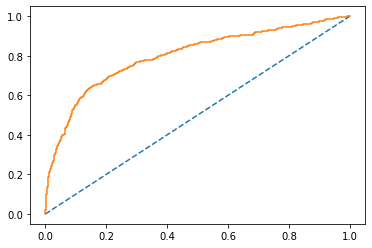

In [308]:
### AUC and ROC for the training data
# predict probabilities
ytrainpredict_prob1 = log_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrainpredict_prob1=ytrainpredict_prob1[:,1]
# calculate AUC
train_auc = roc_auc_score(y_train, ytrainpredict_prob1)
print('AUC: %.3f' % train_auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,ytrainpredict_prob1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [309]:
confusion_matrix(y_train,ytrainpredict1)

array([[2699,   76],
       [ 464,  182]], dtype=int64)

In [310]:
print(classification_report(y_train,ytrainpredict1))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2775
           1       0.71      0.28      0.40       646

    accuracy                           0.84      3421
   macro avg       0.78      0.63      0.66      3421
weighted avg       0.83      0.84      0.81      3421



In [311]:
print(classification_report(y_test,ytestpredict1))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1193
           1       0.69      0.28      0.40       274

    accuracy                           0.84      1467
   macro avg       0.77      0.63      0.65      1467
weighted avg       0.82      0.84      0.81      1467



#### decision tree

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
# Initialise a Decision Tree Classifier
dt_model=DecisionTreeClassifier(criterion="gini",random_state=2)


In [155]:
# Fit the model

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2)

In [156]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                  Imp
Age                          0.147467
MonthlyIncome                0.133776
Designation_codes            0.089262
DurationOfPitch_num          0.081433
Passport                     0.071994
PitchSatisfactionScore_num   0.064304
MaritalStatus                0.059514
NumberOfTrips_num            0.054489
CityTier                     0.050878
Occupation                   0.046130
PreferredLoginDevice         0.045718
PreferredPropertyStar_codes  0.036921
Gender                       0.028600
NumberOfFollowups_num        0.025319
NumberOfPersonVisited        0.021036
OwnCar                       0.018667
ProductPitched_codes         0.014420
NumberOfChildrenVisited_num  0.010071


In [157]:
### regularize decision tree: adding tuning parameter

In [158]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30,min_samples_leaf=100,min_samples_split=1000)
reg_dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=1000)

In [159]:
print(pd.DataFrame(reg_dt_model.feature_importances_,columns=["IMP"],index=X_train.columns).sort_values("IMP",ascending=False))

                                  IMP
Passport                     0.723054
Age                          0.118385
PreferredPropertyStar_codes  0.093613
NumberOfFollowups_num        0.026805
Occupation                   0.023478
PitchSatisfactionScore_num   0.014665
PreferredLoginDevice         0.000000
Designation_codes            0.000000
NumberOfPersonVisited        0.000000
NumberOfChildrenVisited_num  0.000000
NumberOfTrips_num            0.000000
ProductPitched_codes         0.000000
CityTier                     0.000000
MonthlyIncome                0.000000
OwnCar                       0.000000
MaritalStatus                0.000000
Gender                       0.000000
DurationOfPitch_num          0.000000


In [160]:
# Complete the below code
ytrain_predict =reg_dt_model.predict(X_train) 
ytest_predict = reg_dt_model.predict(X_test)



In [161]:
reg_dt_model.score(X_train,y_train)

0.8111663256357791

In [162]:
reg_dt_model.score(X_test,y_test)

0.8132242672119973

In [164]:
confusion_matrix(y_train,ytrain_predict)

array([[2775,    0],
       [ 646,    0]], dtype=int64)

In [165]:
confusion_matrix(y_test,ytest_predict)

array([[1193,    0],
       [ 274,    0]], dtype=int64)

#### RandomForest model

In [314]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,oob_score=True)
rf.fit(X_train,y_train)
print(rf.oob_score_)

0.9003215434083601


In [320]:
rfcl=RandomForestClassifier(n_estimators=100,max_features=12,random_state=42)
rfcl.fit(X_train,y_train)

RandomForestClassifier(max_features=12, random_state=42)

####  predicting train and test data with RF

In [332]:
ytrain_predict2=rfcl.predict(X_train)
ytest_predict2=rfcl.predict(X_test)

In [322]:
###  model performance for test set 

In [323]:
rfcl.score(X_train,y_train)

1.0

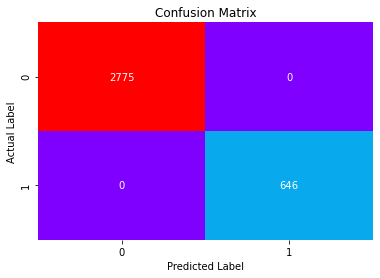

In [325]:
confusion_matrix(y_train,ytrain_predict2)
sns.heatmap(confusion_matrix(y_train,ytrain_predict2),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [327]:
print(classification_report(y_train,ytrain_predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2775
           1       1.00      1.00      1.00       646

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421



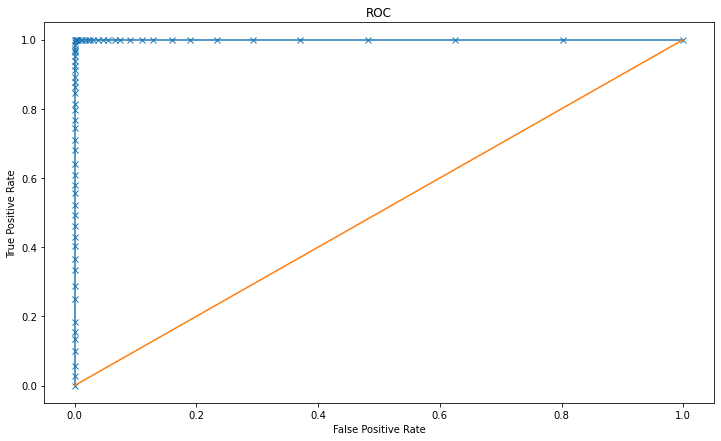

Area under Curve is 0.9999999999999999


In [328]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,rfcl.predict_proba(X_train)[:,1]))

In [329]:
### for test set

In [330]:
rfcl.score(X_test,y_test)

0.9154737559645535

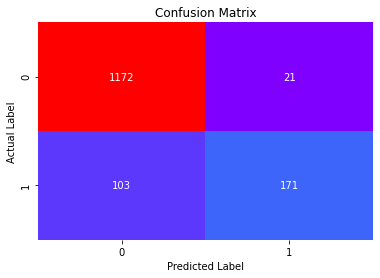

In [333]:
confusion_matrix(y_test,ytest_predict2)
sns.heatmap(confusion_matrix(y_test,ytest_predict2),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [334]:
print(classification_report(y_test,ytest_predict2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1193
           1       0.89      0.62      0.73       274

    accuracy                           0.92      1467
   macro avg       0.90      0.80      0.84      1467
weighted avg       0.91      0.92      0.91      1467



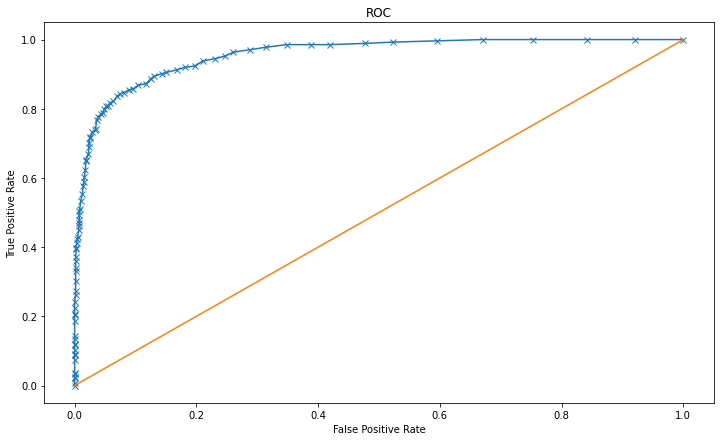

Area under Curve is 0.8032424544636902


In [335]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,rfcl.predict(X_test)))

In [336]:
#### Grid Search for finding out the optimal values for the hyper parameters

In [337]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [338]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [339]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 200}

In [340]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=50, n_estimators=200)

In [341]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

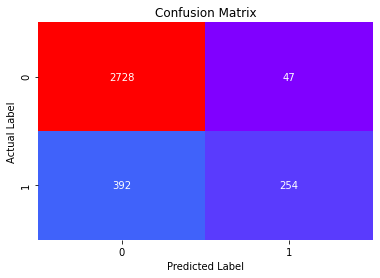

In [342]:
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [343]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      2775
           1       0.84      0.39      0.54       646

    accuracy                           0.87      3421
   macro avg       0.86      0.69      0.73      3421
weighted avg       0.87      0.87      0.85      3421



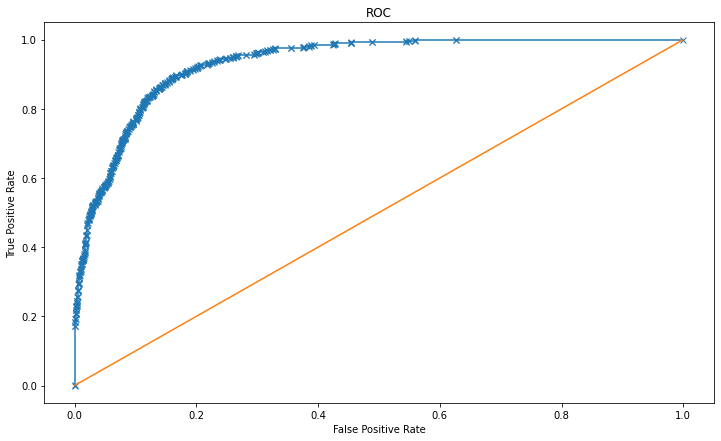

Area under Curve is 0.6881259587761136


In [345]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict(X_train)))

In [348]:
best_grid.score(X_train,y_train)

0.8716749488453669

In [349]:
## for test set

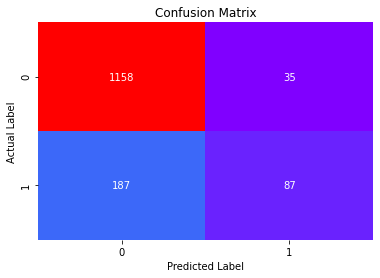

In [351]:
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [352]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1193
           1       0.71      0.32      0.44       274

    accuracy                           0.85      1467
   macro avg       0.79      0.64      0.68      1467
weighted avg       0.83      0.85      0.82      1467



In [353]:
best_grid.score(X_test,y_test)

0.8486707566462167

#### Naive bayes model

In [355]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [356]:
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [357]:
NB_model.score(X_train,y_train)

0.8389359836305174

In [358]:
y_trainpredict=NB_model.predict(X_train)
y_testpredict=NB_model.predict(X_test)

In [359]:
confusion_matrix(y_train,y_trainpredict)

array([[2598,  177],
       [ 374,  272]], dtype=int64)

In [360]:
print(classification_report(y_train,y_trainpredict))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2775
           1       0.61      0.42      0.50       646

    accuracy                           0.84      3421
   macro avg       0.74      0.68      0.70      3421
weighted avg       0.82      0.84      0.83      3421



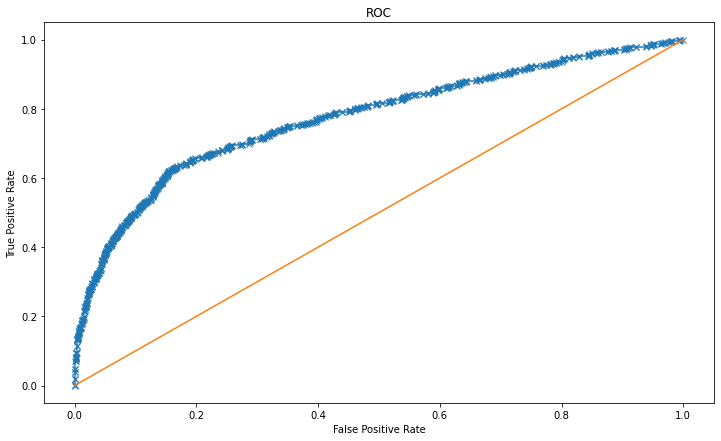

Area under Curve is 0.6786344238975818


In [361]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,NB_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,NB_model.predict(X_train)))

In [362]:
### for test set

In [364]:
NB_model.score(X_test,y_test)

0.8336741649625086

In [367]:
confusion_matrix(y_test,y_testpredict)

array([[1113,   80],
       [ 164,  110]], dtype=int64)

In [368]:
print(classification_report(y_test,y_testpredict))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1193
           1       0.58      0.40      0.47       274

    accuracy                           0.83      1467
   macro avg       0.73      0.67      0.69      1467
weighted avg       0.82      0.83      0.82      1467



#### Support vector machine

In [79]:
from sklearn import svm

In [80]:
SVM_model= svm.SVC(random_state=1,probability=True)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [81]:
ytrain_predict4=SVM_model.predict(X_train)
ytest_predict4=SVM_model.predict(X_test)

In [82]:
# getting predicted class and probability

In [83]:
ytrain_predictprob4=SVM_model.predict_proba(X_train)
ytrain_predictprob4

array([[0.81872655, 0.18127345],
       [0.81310959, 0.18689041],
       [0.80894559, 0.19105441],
       ...,
       [0.82149247, 0.17850753],
       [0.82199717, 0.17800283],
       [0.81184894, 0.18815106]])

In [84]:
pd.DataFrame(ytrain_predictprob4).head()

,0,1
0,0.818727,0.181273
1,0.813110,0.186890
2,0.808946,0.191054
3,0.822158,0.177842
4,0.821056,0.178944


In [85]:
### for test set

In [86]:
ytest_predictprob4=SVM_model.predict_proba(X_test)
ytest_predictprob4

array([[0.81771046, 0.18228954],
       [0.8185869 , 0.1814131 ],
       [0.82108381, 0.17891619],
       ...,
       [0.82225204, 0.17774796],
       [0.79895668, 0.20104332],
       [0.80549607, 0.19450393]])

In [87]:
pd.DataFrame(ytest_predictprob4).head()

,0,1
0,0.817710,0.182290
1,0.818587,0.181413
2,0.821084,0.178916
3,0.822230,0.177770
4,0.821673,0.178327


In [88]:
SVM_model.score(X_train,y_train)

0.8111663256357791

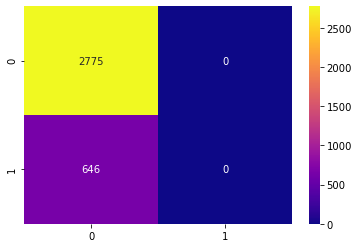

In [93]:
confusion_matrix(y_train,ytrain_predict4)
sns.heatmap(confusion_matrix(y_train,ytrain_predict4),annot=True,fmt="d",cmap="plasma")

In [96]:
print(classification_report(y_test,ytest_predict4))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1193
           1       0.00      0.00      0.00       274

    accuracy                           0.81      1467
   macro avg       0.41      0.50      0.45      1467
weighted avg       0.66      0.81      0.73      1467



In [89]:
SVM_model.score(X_test,y_test)

0.8132242672119973

In [97]:
confusion_matrix(y_test,ytest_predict4)

array([[1193,    0],
       [ 274,    0]], dtype=int64)

In [98]:
print(classification_report(y_test,ytest_predict4))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1193
           1       0.00      0.00      0.00       274

    accuracy                           0.81      1467
   macro avg       0.41      0.50      0.45      1467
weighted avg       0.66      0.81      0.73      1467



In [ ]:
### Recall is very poor

#### Linear Discriminant Analysis

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [100]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8450745396083017
[[2683   92]
 [ 438  208]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2775
           1       0.69      0.32      0.44       646

    accuracy                           0.85      3421
   macro avg       0.78      0.64      0.67      3421
weighted avg       0.83      0.85      0.82      3421



In [101]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8438991138377642
[[1153   40]
 [ 189   85]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1193
           1       0.68      0.31      0.43       274

    accuracy                           0.84      1467
   macro avg       0.77      0.64      0.67      1467
weighted avg       0.83      0.84      0.82      1467



#### KNN model

In [103]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [104]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8377667348728441
[[2681   94]
 [ 461  185]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2775
           1       0.66      0.29      0.40       646

    accuracy                           0.84      3421
   macro avg       0.76      0.63      0.65      3421
weighted avg       0.82      0.84      0.81      3421



In [105]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7961826857532379
[[1129   64]
 [ 235   39]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      1193
           1       0.38      0.14      0.21       274

    accuracy                           0.80      1467
   macro avg       0.60      0.54      0.54      1467
weighted avg       0.74      0.80      0.76      1467



#### ADA BOOST

In [107]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [108]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8553054662379421
[[2690   85]
 [ 410  236]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2775
           1       0.74      0.37      0.49       646

    accuracy                           0.86      3421
   macro avg       0.80      0.67      0.70      3421
weighted avg       0.84      0.86      0.83      3421



In [109]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8370824812542604
[[1145   48]
 [ 191   83]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1193
           1       0.63      0.30      0.41       274

    accuracy                           0.84      1467
   macro avg       0.75      0.63      0.66      1467
weighted avg       0.82      0.84      0.81      1467



### XG boost

In [111]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8927214264834844
[[2734   41]
 [ 326  320]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2775
           1       0.89      0.50      0.64       646

    accuracy                           0.89      3421
   macro avg       0.89      0.74      0.79      3421
weighted avg       0.89      0.89      0.88      3421



In [113]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8732106339468303
[[1160   33]
 [ 153  121]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1193
           1       0.79      0.44      0.57       274

    accuracy                           0.87      1467
   macro avg       0.83      0.71      0.75      1467
weighted avg       0.87      0.87      0.86      1467



### Bagging: with deision tree

Bootstrap aggregating, also called bagging (from bootstrap aggregating), is a machine learning ensemble meta-algorithm designed
to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. ... 
Bagging is a special case of the model averaging approach.

In [115]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [116]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[2775    0]
 [   0  646]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2775
           1       1.00      1.00      1.00       646

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421



In [117]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9297886843899114
[[1174   19]
 [  84  190]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1193
           1       0.91      0.69      0.79       274

    accuracy                           0.93      1467
   macro avg       0.92      0.84      0.87      1467
weighted avg       0.93      0.93      0.93      1467



#### Bagging : with random forest

In [118]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [119]:
RF_model=RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [120]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.9909383221280328
[[2775    0]
 [  31  615]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2775
           1       1.00      0.95      0.98       646

    accuracy                           0.99      3421
   macro avg       0.99      0.98      0.98      3421
weighted avg       0.99      0.99      0.99      3421



In [121]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8922972051806408
[[1181   12]
 [ 146  128]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1193
           1       0.91      0.47      0.62       274

    accuracy                           0.89      1467
   macro avg       0.90      0.73      0.78      1467
weighted avg       0.89      0.89      0.88      1467



### Among all the model accuracy and recall is good for bagging with decision tree and also accuracyBut model is still overfiiting problem

### model Tuning

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
param_grid={"solver":["newton-cg","lbfgs","liblinear"],
            "max_iter":[1000,2000],
            "n_jobs":[2,3]
           }

In [125]:
logs_model=LogisticRegression(random_state=1)
grid_search=GridSearchCV(logs_model,param_grid=param_grid,cv=3)

In [126]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=1),
             param_grid={'max_iter': [1000, 2000], 'n_jobs': [2, 3],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [127]:
grid_search.best_params_

{'max_iter': 1000, 'n_jobs': 2, 'solver': 'newton-cg'}

In [128]:
best_grid=grid_search.best_estimator_

In [129]:
ytrain_predictb=best_grid.predict(X_train)
ytest_predictb=best_grid.predict(X_train)

In [130]:
# performance on train set
ytrain_predictb=best_grid.predict(X_train)
model_score=best_grid.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predictb))
print(classification_report(y_train,ytrain_predictb))

0.8479976615024847
[[2710   65]
 [ 455  191]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2775
           1       0.75      0.30      0.42       646

    accuracy                           0.85      3421
   macro avg       0.80      0.64      0.67      3421
weighted avg       0.84      0.85      0.82      3421



In [131]:
# performance on test set
ytest_predictb=best_grid.predict(X_test)
model_score=best_grid.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predictb))
print(classification_report(y_test,ytest_predictb))

0.841854124062713
[[1159   34]
 [ 198   76]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1193
           1       0.69      0.28      0.40       274

    accuracy                           0.84      1467
   macro avg       0.77      0.62      0.65      1467
weighted avg       0.82      0.84      0.81      1467



###  Linear discriminant Analysis

In [132]:
param_grid={
           "solver":["lsqr","svd","eigen"],
           
            "tol":[0.001,0.0001,0.00001]
           }

In [133]:
lda_model=LinearDiscriminantAnalysis()
grid_search=GridSearchCV(lda_model,param_grid=param_grid,cv=3)

In [134]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['lsqr', 'svd', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]})

In [135]:
grid_search.best_params_

{'solver': 'svd', 'tol': 0.001}

In [136]:
best_grid1=grid_search.best_estimator_

In [137]:
ytrain_predictb1=best_grid1.predict(X_train)
ytest_predictb1=best_grid1.predict(X_test)

In [138]:
# performance on train set
ytrain_predictb1=best_grid1.predict(X_train)
model_score=best_grid1.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predictb1))
print(classification_report(y_train,ytrain_predictb1))

0.8450745396083017
[[2683   92]
 [ 438  208]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2775
           1       0.69      0.32      0.44       646

    accuracy                           0.85      3421
   macro avg       0.78      0.64      0.67      3421
weighted avg       0.83      0.85      0.82      3421



In [139]:
# performance on test set
ytrain_predictb1=best_grid1.predict(X_test)
model_score=best_grid1.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predictb1))
print(classification_report(y_test,ytest_predictb1))

0.8438991138377642
[[1153   40]
 [ 189   85]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1193
           1       0.68      0.31      0.43       274

    accuracy                           0.84      1467
   macro avg       0.77      0.64      0.67      1467
weighted avg       0.83      0.84      0.82      1467



#### KNN model

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
param_grid={'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

In [142]:
knn_model=KNeighborsClassifier(n_jobs=1)
grid_search=GridSearchCV(knn_model,param_grid=param_grid,cv=3)


In [143]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=1),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [144]:
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 5,
 'n_jobs': -1,
 'n_neighbors': 10,
 'weights': 'distance'}

In [146]:
best_grid2=grid_search.best_estimator_

In [147]:
ytrain_predictb2=best_grid2.predict(X_train)
ytest_predictb2=best_grid2.predict(X_test)

In [148]:
# performance on train set
ytrain_predictb2=best_grid2.predict(X_train)
model_score=best_grid1.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predictb2))
print(classification_report(y_train,ytrain_predictb2))

0.8450745396083017
[[2775    0]
 [   0  646]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2775
           1       1.00      1.00      1.00       646

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421



In [149]:
# performance on train set
ytest_predictb2=best_grid2.predict(X_test)
model_score=best_grid1.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predictb2))
print(classification_report(y_test,ytest_predictb2))

0.8438991138377642
[[1160   33]
 [ 166  108]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1193
           1       0.77      0.39      0.52       274

    accuracy                           0.86      1467
   macro avg       0.82      0.68      0.72      1467
weighted avg       0.85      0.86      0.85      1467



#### Support Vector Machine(SVM)

In [150]:
from sklearn.svm import SVC

In [151]:
param_grid ={"C":[1,10,100],
         'kernel': ['linear','rbf',"poly"],
          "gamma":[0.0001,0.001],
         
          }

In [152]:
svm_model=SVC(random_state=1,probability=True)
grid_search=GridSearchCV(svm_model,param_grid=param_grid,cv=3)

In [ ]:
grid_search.fit(X_train,y_train)

### SMOTE : for imbalance data

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
### SMOTE is applied only on train data

In [79]:
sm=SMOTE(random_state=2)
X_train_res,y_train_res=sm.fit_sample(X_train,y_train.ravel())

In [80]:
## Let's check the shape after SMOTE
X_train_res.shape

(5550, 18)

#### Naive Bayes with SMOTE

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [82]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [83]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.7052252252252252
[[1829  946]
 [ 690 2085]]
              precision    recall  f1-score   support

           0       0.73      0.66      0.69      2775
           1       0.69      0.75      0.72      2775

    accuracy                           0.71      5550
   macro avg       0.71      0.71      0.70      5550
weighted avg       0.71      0.71      0.70      5550



In [84]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.65439672801636
[[805 388]
 [119 155]]
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      1193
           1       0.29      0.57      0.38       274

    accuracy                           0.65      1467
   macro avg       0.58      0.62      0.57      1467
weighted avg       0.76      0.65      0.69      1467



#### KNN with SMOTE

In [85]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [86]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8331531531531532
[[2181  594]
 [ 332 2443]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.82      2775
           1       0.80      0.88      0.84      2775

    accuracy                           0.83      5550
   macro avg       0.84      0.83      0.83      5550
weighted avg       0.84      0.83      0.83      5550



In [87]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6809815950920245
[[847 346]
 [122 152]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      1193
           1       0.31      0.55      0.39       274

    accuracy                           0.68      1467
   macro avg       0.59      0.63      0.59      1467
weighted avg       0.77      0.68      0.71      1467



#### XG Boost with SMOTE

In [88]:
import xgboost as xgb
XGB_SM_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_SM_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
## Performance Matrix on train data set
y_train_predict = XGB_SM_model.predict(X_train_res)
model_score = XGB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8117117117117117
[[2342  433]
 [ 612 2163]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      2775
           1       0.83      0.78      0.81      2775

    accuracy                           0.81      5550
   macro avg       0.81      0.81      0.81      5550
weighted avg       0.81      0.81      0.81      5550



In [90]:
## Performance Matrix on test data set
y_test_predict = XGB_SM_model.predict(X_test)
model_score = XGB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7880027266530334
[[997 196]
 [115 159]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1193
           1       0.45      0.58      0.51       274

    accuracy                           0.79      1467
   macro avg       0.67      0.71      0.69      1467
weighted avg       0.81      0.79      0.80      1467



#### SVM with SMOTE

In [92]:
from sklearn import svm

SVM_SM_model= svm.SVC(random_state=1)
SVM_SM_model.fit(X_train_res, y_train_res)

SVC(random_state=1)

In [93]:
## Performance Matrix on train data set
y_train_predict = SVM_SM_model.predict(X_train_res)
model_score = SVM_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.594954954954955
[[1666 1109]
 [1139 1636]]
              precision    recall  f1-score   support

           0       0.59      0.60      0.60      2775
           1       0.60      0.59      0.59      2775

    accuracy                           0.59      5550
   macro avg       0.59      0.59      0.59      5550
weighted avg       0.59      0.59      0.59      5550



In [94]:
## Performance Matrix on test data set
y_test_predict = SVM_SM_model.predict(X_test)
model_score = SVM_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.5828220858895705
[[706 487]
 [125 149]]
              precision    recall  f1-score   support

           0       0.85      0.59      0.70      1193
           1       0.23      0.54      0.33       274

    accuracy                           0.58      1467
   macro avg       0.54      0.57      0.51      1467
weighted avg       0.73      0.58      0.63      1467



#### Logistic regression with SMOTE

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
logs_model=LogisticRegression()
logs_model.fit(X_train_res,y_train_res)

LogisticRegression()

In [101]:
## Performance Matrix on train data set
y_train_predict = logs_model.predict(X_train_res)
model_score = logs_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.738018018018018
[[2089  686]
 [ 768 2007]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      2775
           1       0.75      0.72      0.73      2775

    accuracy                           0.74      5550
   macro avg       0.74      0.74      0.74      5550
weighted avg       0.74      0.74      0.74      5550



In [105]:
## Performance Matrix on test data set
y_test_predict = logs_model.predict(X_test)
model_score = logs_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7177914110429447
[[891 302]
 [112 162]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1193
           1       0.35      0.59      0.44       274

    accuracy                           0.72      1467
   macro avg       0.62      0.67      0.63      1467
weighted avg       0.79      0.72      0.74      1467



In [106]:
#### Bagging :with decisin tree an SMOTE

In [107]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train_res, y_train_res)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [108]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train_res)
model_score =Bagging_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

1.0
[[2775    0]
 [   0 2775]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2775
           1       1.00      1.00      1.00      2775

    accuracy                           1.00      5550
   macro avg       1.00      1.00      1.00      5550
weighted avg       1.00      1.00      1.00      5550



In [109]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9195637355146558
[[1142   51]
 [  67  207]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1193
           1       0.80      0.76      0.78       274

    accuracy                           0.92      1467
   macro avg       0.87      0.86      0.86      1467
weighted avg       0.92      0.92      0.92      1467

